In [1780]:
!pip install "numpy<2"
# --- Librerías base ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualización y entorno ---
from IPython.display import display

# --- Estadística y análisis ---
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm

# --- Librería ISLP ---
from ISLP import load_data

# --- Machine Learning / Modelado ---
from sklearn import datasets
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    confusion_matrix,
    accuracy_score,
    recall_score,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.pipeline import Pipeline

# --- Clustering jerárquico ---
from scipy.cluster.hierarchy import linkage, dendrogram

# --- Colores / visualización extra ---
from matplotlib.colors import ListedColormap


# Recap TP 1 y 2

In [1996]:
os.getcwd() # Ver donde estamos ubicados

'C:\\Users\\Ramses\\TP2'

In [1998]:
os.chdir('C:\\Users\\Ramses\\TP2') # Ubicarnos en la carpeta del tp

In [2000]:
#importamos la base de datos del 2005
df05_total = pd.read_stata("Individual_t105.dta",convert_categoricals=False)
df05_total.columns = df05_total.columns.str.upper()
#df05_total.info()
df05_total

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,125098,1.00,1.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,017.00",...,08,,07,08,,05,0.00,0.00,0.00,00000
1,125188,1.00,1.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",...,02,,02,02,,01,0.00,0.00,0.00,40020
2,125188,1.00,2.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",...,02,,02,02,,01,0.00,0.00,0.00,00000
3,125188,1.00,3.00,0.00,"2,005.00",1.00,1.00,S,32.00,"1,062.00",...,02,,02,02,,01,0.00,0.00,0.00,00000
4,125242,1.00,1.00,1.00,"2,005.00",1.00,1.00,S,32.00,"1,103.00",...,09,,09,09,,07,0.00,0.00,0.00,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,288015,1.00,3.00,1.00,"2,005.00",1.00,44.00,N,31.00,129.00,...,09,10,09,,10,07,0.00,0.00,0.00,00000
47026,288015,1.00,4.00,1.00,"2,005.00",1.00,44.00,N,31.00,129.00,...,09,10,09,,10,07,0.00,0.00,0.00,00000
47027,288294,1.00,1.00,1.00,"2,005.00",1.00,44.00,N,31.00,107.00,...,10,10,09,,10,09,0.00,0.00,0.00,00000
47028,288294,1.00,2.00,1.00,"2,005.00",1.00,44.00,N,31.00,107.00,...,10,10,09,,10,09,0.00,0.00,0.00,00000


In [2001]:
#con tal de ser organizados reunimos la siguiente informacion sobre las variables usadas
variables = ["CODUSU","COMPONENTE","ANO4","CH03","CH04","CH06","CH07","CH08","CH09","CH10","CH11","CH12","CH13","CH14","CH15","CH16","NIVEL_ED","ESTADO","CAT_INAC","CAT_OCUP","IPCF","ITF","PP3E_TOT","PP3F_TOT"]

#metemos diccionarios para cada variables con que representa cada una, 

descripciones = {
    "CODUSU": "Código para distinguir VIVIENDAS, permite aparearlas con Hogares y Personas. Además permite hacer el seguimiento a través de los trimestres.",
    "COMPONENTE": "Num identificador",
    "ANO4": "Año",
    "CH03": "Relación de parentesco",
    "CH04": "Sexo",
    "CH06": "Edad en años",
    "CH07": "Estado civil",
    "CH08": "Cobertura médica",
    "CH09": "¿Sabe leer y escribir?",
    "CH10": "¿Asiste o asistió a algún establecimiento educativo? (colegio, escuela,universidad)",
    "CH11": "Ese establecimiento es...",
    "CH12": "¿Cuál es el nivel más alto que cursa o cursó?",
    "CH13": "¿Finalizó ese nivel?",
    "CH14": "¿Cuál fue el último año que aprobó?",
    "CH15": "¿Dónde nació?",
    "CH16": "¿Dónde vivía hace 5 años?",
    "NIVEL_ED": "Nivel educativo",
    "ESTADO": "Condición de actividad",
    "CAT_INAC": "Categoría de inactividad",
    "CAT_OCUP": "Categoria ocupacional",
    "IPCF": "Ingreso per cápita familiar",
    "ITF": "Monto del ingreso total familiar",
    "PP3E_TOT": "Total de horas que trabajó en la semana en la ocupación principal",
    "PP3F_TOT": "Total de horas que trabajó en la semana en otras ocupaciones"
}

# ...y como fueron codificadas las no respuestas
missing = {
    "CODUSU": "-",
    "COMPONENTE": "-",
    "ANO4": "-",
    "CH04": "-",
    "CH03": "-",
    "CH06": "-1",
    "CH07": "9",
    "CH08": "9",
    "CH09": "9",
    "CH10": "-",
    "CH11": "9",
    "CH12": "-",
    "CH13": "9",
    "CH14": "99",
    "CH15": "9",
    "CH16": "9",
    "NIVEL_ED": "9",
    "ESTADO": "0",
    "CAT_INAC": "0",
    "CAT_OCUP": "9",  
    "IPCF": "-",
    "ITF": "-",
    "PP3E_TOT": "-",
    "PP3F_TOT": "-"
}

In [2002]:
# Filtramos la base 2005 para obtener solo las observaciones del GBA
df05gba= df05_total[df05_total['REGION'] == 1]
df05 = df05gba[variables]

print("\nFilas y Columnas Base 2005:", df05.shape)

#df05.info()
df05.head(10)
#df05.dtypes


Filas y Columnas Base 2005: (9484, 24)


,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,IPCF,ITF,PP3E_TOT,PP3F_TOT
0,125098,1.00,"2,005.00",1.00,1.00,80.00,4.00,1.00,1.00,2.00,...,1.00,1.00,3.00,3.00,1.00,0.00,583.00,583.00,0.00,0.00
1,125188,1.00,"2,005.00",1.00,1.00,26.00,2.00,4.00,1.00,2.00,...,2.00,1.00,4.00,1.00,0.00,2.00,150.00,450.00,20.00,0.00
2,125188,2.00,"2,005.00",2.00,2.00,27.00,2.00,4.00,1.00,2.00,...,1.00,1.00,6.00,3.00,4.00,0.00,150.00,450.00,0.00,0.00
3,125188,3.00,"2,005.00",3.00,2.00,-1.00,5.00,4.00,3.00,0.00,...,1.00,6.00,7.00,4.00,5.00,0.00,150.00,450.00,0.00,0.00
4,125242,1.00,"2,005.00",1.00,2.00,71.00,4.00,1.00,1.00,2.00,...,1.00,1.00,2.00,3.00,1.00,0.00,855.00,855.00,0.00,0.00
5,125436,1.00,"2,005.00",1.00,1.00,54.00,2.00,1.00,1.00,2.00,...,1.00,1.00,4.00,1.00,0.00,2.00,"1,016.00","5,080.00",40.00,0.00
6,125436,2.00,"2,005.00",2.00,2.00,54.00,2.00,1.00,1.00,2.00,...,1.00,1.00,4.00,3.00,4.00,0.00,"1,016.00","5,080.00",0.00,0.00
7,125436,3.00,"2,005.00",3.00,2.00,27.00,5.00,1.00,1.00,2.00,...,1.00,1.00,4.00,3.00,7.00,0.00,"1,016.00","5,080.00",0.00,0.00
8,125436,4.00,"2,005.00",3.00,1.00,20.00,5.00,1.00,1.00,1.00,...,1.00,1.00,3.00,2.00,0.00,3.00,"1,016.00","5,080.00",0.00,0.00
9,125436,5.00,"2,005.00",3.00,2.00,18.00,5.00,1.00,1.00,1.00,...,1.00,1.00,5.00,3.00,3.00,0.00,"1,016.00","5,080.00",0.00,0.00


In [2003]:
#df05.dtypes --> vimos que CH14 esta como object, asi que lo tranformamos a float
df05["CH14"] = pd.to_numeric(df05["CH14"], errors="coerce")

C:\Users\Ramses\AppData\Local\Temp\ipykernel_28904\3915449138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df05["CH14"] = pd.to_numeric(df05["CH14"], errors="coerce")


In [2004]:
df05["CH14"]

0      2.00
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9479    NaN
9480    NaN
9481    NaN
9482    NaN
9483   8.00
Name: CH14, Length: 9484, dtype: float64

In [2005]:
# matriz
matriz_nan05 = pd.DataFrame({
    "Numero de Nans": df05.isna().sum(),
    "%Nans": (df05.isna().sum() / len(df05)) * 100
})

# opcional: redondear a 2 decimales
matriz_nan05["%Nans"] = matriz_nan05["%Nans"].round(2)

# mostrar
display(matriz_nan05)

,Numero de Nans,%Nans
CODUSU,0,0.00
COMPONENTE,0,0.00
ANO4,0,0.00
CH03,0,0.00
CH04,0,0.00
CH06,0,0.00
CH07,0,0.00
CH08,0,0.00
CH09,0,0.00
CH10,0,0.00


In [2012]:
#importamos la base de datos del 2025
df25_total = pd.read_excel("usu_individual_T125.xlsx")
#df25_total.info()

In [2013]:
# Filtrar el df 2025 para obtener solo las observaciones del GBA
df25gba = df25_total[df25_total['REGION'] == 1]
df25 = df25gba[variables]

print("\nFilas y Columnas Base 2025:", df25.shape)
print()

#df25.sample(10)
#df25.info()
df25 = df25.reset_index(drop=True)
df25.head()
#display(df25.dtypes)


Filas y Columnas Base 2025: (7181, 24)



,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,IPCF,ITF,PP3E_TOT,PP3F_TOT
0,TQRMNORVYHLNOTCDEIJAH00855496,2,2025,3,1,30,5,1.00,1,2,...,1,1,3,1,0,3,"375,500.00",751000,45.00,0.00
1,TQRMNOQTYHJOPTCDEIJAH00877882,1,2025,1,1,82,4,1.00,1,2,...,3,1,1,3,7,0,"251,600.00",1258000,NaN,NaN
2,TQRMNOQTYHJOPTCDEIJAH00877882,2,2025,3,1,34,1,4.00,1,2,...,1,1,4,1,0,1,"251,600.00",1258000,50.00,0.00
3,TQRMNOQTYHJOPTCDEIJAH00877882,3,2025,4,2,32,1,4.00,1,2,...,1,1,4,3,4,0,"251,600.00",1258000,NaN,NaN
4,TQRMNOQTYHJOPTCDEIJAH00877882,4,2025,5,1,10,5,4.00,1,1,...,1,1,1,3,3,0,"251,600.00",1258000,NaN,NaN


In [2014]:
# matriz
matriz_nan25 = pd.DataFrame({
    "Numero de Nans": df25.isna().sum(),
    "%Nans": (df25.isna().sum() / len(df25)) * 100
})

# opcional: redondear a 2 decimales
matriz_nan25["%Nans"] = matriz_nan25["%Nans"].round(2)

# mostrar
display(matriz_nan25)

,Numero de Nans,%Nans
CODUSU,0,0.00
COMPONENTE,0,0.00
ANO4,0,0.00
CH03,0,0.00
CH04,0,0.00
CH06,0,0.00
CH07,0,0.00
CH08,0,0.00
CH09,0,0.00
CH10,0,0.00


In [2015]:
def safe_float_to_int(df, reset_index=False, strict=True):
    """
    Convierte columnas float a Int64 si todos los valores no nulos son enteros.
    Mantiene floats continuos y strings sin cambios.
    
    Parámetros:
        df (DataFrame): DataFrame de entrada
        reset_index (bool): si True, resetea el índice a 0..N-1
        strict (bool): si True, no convierte nada si hay decimales.
    """
    df_copy = df.copy()
    cols_converted = []

    for col in df_copy.columns:
        if pd.api.types.is_float_dtype(df_copy[col]):
            valores = df_copy[col].dropna()
            if len(valores) > 0 and valores.apply(float.is_integer).all():
                df_copy[col] = df_copy[col].astype("Int64")  # permite NaN → <NA>
                cols_converted.append(col)
            elif strict:
                continue

    if reset_index:
        df_copy = df_copy.reset_index(drop=True)

    print("✅ Columnas convertidas a Int64:", cols_converted if cols_converted else "Ninguna")

    return df_copy

df25 = safe_float_to_int(df25)
df05 = safe_float_to_int(df05)

print("\nFilas y Columnas Base 2025:", df25.shape)
print("Filas y Columnas Base 2025:", df05.shape)

#df05.head(10)
df25.head(10)

✅ Columnas convertidas a Int64: ['CH08', 'CH14', 'PP3E_TOT', 'PP3F_TOT']
✅ Columnas convertidas a Int64: ['COMPONENTE', 'ANO4', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'ITF', 'PP3E_TOT', 'PP3F_TOT']

Filas y Columnas Base 2025: (7181, 24)
Filas y Columnas Base 2025: (9484, 24)


,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,IPCF,ITF,PP3E_TOT,PP3F_TOT
0,TQRMNORVYHLNOTCDEIJAH00855496,2,2025,3,1,30,5,1,1,2,...,1,1,3,1,0,3,"375,500.00",751000,45,0
1,TQRMNOQTYHJOPTCDEIJAH00877882,1,2025,1,1,82,4,1,1,2,...,3,1,1,3,7,0,"251,600.00",1258000,<NA>,<NA>
2,TQRMNOQTYHJOPTCDEIJAH00877882,2,2025,3,1,34,1,4,1,2,...,1,1,4,1,0,1,"251,600.00",1258000,50,0
3,TQRMNOQTYHJOPTCDEIJAH00877882,3,2025,4,2,32,1,4,1,2,...,1,1,4,3,4,0,"251,600.00",1258000,<NA>,<NA>
4,TQRMNOQTYHJOPTCDEIJAH00877882,4,2025,5,1,10,5,4,1,1,...,1,1,1,3,3,0,"251,600.00",1258000,<NA>,<NA>
5,TQRMNOQTYHJOPTCDEIJAH00877882,5,2025,5,2,-1,5,4,3,0,...,1,6,7,4,5,0,"251,600.00",1258000,<NA>,<NA>
6,TQRMNOQWRHLOLSCDEIJAH00872786,1,2025,1,2,61,1,4,1,2,...,1,1,1,3,4,0,"360,000.00",720000,<NA>,<NA>
7,TQRMNOQWRHLOLSCDEIJAH00872786,2,2025,2,1,62,1,1,1,2,...,1,1,1,1,0,3,"360,000.00",720000,0,0
8,TQRMNOQUYHKMLQCDEIJAH00861665,1,2025,1,2,41,3,4,1,2,...,1,1,2,2,0,3,"60,000.00",240000,<NA>,<NA>
9,TQRMNOQUYHKMLQCDEIJAH00861665,2,2025,3,2,15,5,4,1,1,...,1,1,3,3,3,0,"60,000.00",240000,<NA>,<NA>


In [2016]:
def comparar_valores(df1, df2, variables, nombre_df1="2005", nombre_df2="2025"):
    for var in variables:
        descripcion = descripciones.get(var, var)  # usa descripción si existe, sino el nombre literal

        print(f"\n📌 Comparación de variable: {descripcion}\n")

        conteo1 = df1[var].value_counts(dropna=False).sort_index()
        conteo2 = df2[var].value_counts(dropna=False).sort_index()

        comparacion = pd.concat(
            [conteo1, conteo2], axis=1, keys=[nombre_df1, nombre_df2]
        ).fillna(0).astype(int)

        missing_values = missing.get(var, var)
        print(f"Missing values: {missing_values}\n")

        print(comparacion)
        print("-"*60)

comparar_valores(df05,df25,variables)


📌 Comparación de variable: Código para distinguir VIVIENDAS, permite aparearlas con Hogares y Personas. Además permite hacer el seguimiento a través de los trimestres.

Missing values: -

                               2005  2025
CODUSU                                   
125047                            1     0
125049                            3     0
125098                            1     0
125138                            4     0
125169                            6     0
...                             ...   ...
TQTMNOSRYHLLLQCDEIJAH00873989     0     5
TQTMNOSSQHJNMQCDEIJAH00875063     0     4
TQTMNOSTRHLMKUCDEIJAH00861152     0     3
TQTMNOSVUHMNKMCDEIJAH00882448     0     3
TQUMNOSWXHMNLUCDEIJAH00881434     0     6

[5514 rows x 2 columns]
------------------------------------------------------------

📌 Comparación de variable: Num identificador

Missing values: -

            2005  2025
COMPONENTE            
1           2870  2574
2           2421  1971
3           1679  128

In [2017]:
df = pd.concat([df05, df25], ignore_index=True, sort=False)
#sort false: mantenemos el orden de 2005 y agregamos las variables que estan solo en 2025
print("Filas y columnas:", df.shape)

df.head(10)

Filas y columnas: (16665, 24)


,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,IPCF,ITF,PP3E_TOT,PP3F_TOT
0,125098,1,2005,1,1,80,4,1,1,2,...,1,1,3,3,1,0,583.00,583,0,0
1,125188,1,2005,1,1,26,2,4,1,2,...,2,1,4,1,0,2,150.00,450,20,0
2,125188,2,2005,2,2,27,2,4,1,2,...,1,1,6,3,4,0,150.00,450,0,0
3,125188,3,2005,3,2,-1,5,4,3,0,...,1,6,7,4,5,0,150.00,450,0,0
4,125242,1,2005,1,2,71,4,1,1,2,...,1,1,2,3,1,0,855.00,855,0,0
5,125436,1,2005,1,1,54,2,1,1,2,...,1,1,4,1,0,2,"1,016.00",5080,40,0
6,125436,2,2005,2,2,54,2,1,1,2,...,1,1,4,3,4,0,"1,016.00",5080,0,0
7,125436,3,2005,3,2,27,5,1,1,2,...,1,1,4,3,7,0,"1,016.00",5080,0,0
8,125436,4,2005,3,1,20,5,1,1,1,...,1,1,3,2,0,3,"1,016.00",5080,0,0
9,125436,5,2005,3,2,18,5,1,1,1,...,1,1,5,3,3,0,"1,016.00",5080,0,0


In [2018]:
df.dtypes
print("\nResumen variables continuas:\n")
print("\nCH06:\n", df["CH06"].describe())
print("\nIPCF:\n", df["IPCF"].describe())
print("\nITF:\n", df["ITF"].describe())
print("\nPP3E_TOT:\n", df["PP3E_TOT"].describe())
print("\nPP3F_TOT:\n", df["PP3F_TOT"].describe())


Resumen variables continuas:


CH06:
 count   16,665.00
mean        35.64
std         22.62
min         -1.00
25%         16.00
50%         33.00
75%         53.00
max        100.00
Name: CH06, dtype: Float64

IPCF:
 count       16,665.00
mean       160,177.89
std        418,524.01
min              0.00
25%            100.00
50%            350.00
75%         84,000.00
max     10,000,000.00
Name: IPCF, dtype: float64

ITF:
 count       16,665.00
mean       470,492.84
std      1,210,116.05
min              0.00
25%            403.00
50%          1,300.00
75%        274,000.00
max     20,180,000.00
Name: ITF, dtype: Float64

PP3E_TOT:
 count   12,882.00
mean        25.21
std         77.12
min          0.00
25%          0.00
50%          4.00
75%         40.00
max        999.00
Name: PP3E_TOT, dtype: Float64

PP3F_TOT:
 count   12,882.00
mean         1.22
std         23.55
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        999.00
Name: PP3F_TOT, dtype: Floa

In [2019]:
#decodificamos los missing values y valores sin sentido

# Código 999 ("Ns/Nr") en las variables categóricas
df['PP3F_TOT'].replace(999, np.nan, inplace=True)
df['PP3E_TOT'].replace(999, np.nan, inplace=True)
print("Código 999 reemplazado por NaN")

# Código 99 ("Ns/Nr") en las variables categóricas
df['CH14'].replace(99, np.nan, inplace=True)
print("Código 99 reemplazado por NaN")

# Código 9 ("Ns/Nr") en las variables categóricas
df['CH07'].replace(9, np.nan, inplace=True)
df['CH08'].replace(9, np.nan, inplace=True)
df['CH09'].replace(9, np.nan, inplace=True)
df['CH11'].replace(9, np.nan, inplace=True)
df['CH13'].replace(9, np.nan, inplace=True)
df['CH15'].replace(9, np.nan, inplace=True)
df['CH16'].replace(9, np.nan, inplace=True)
df['CAT_OCUP'].replace(9, np.nan, inplace=True)
print("Código 9 reemplazado por NaN")

# Código 0 ("No corresponde" o "No realizada")
df['ESTADO'].replace(0, np.nan, inplace=True)
df['CAT_INAC'].replace(0, np.nan, inplace=True)
df['CAT_OCUP'].replace(0, np.nan, inplace=True) # También limpiamos el 0 de CAT_OCUP
print("Código 0 reemplazado por NaN")

# Valor sin sentido -1 (edad negativa)
df['CH06'].replace(-1, np.nan, inplace=True)
print("Código -1 reemplazado por NaN")

Código 999 reemplazado por NaN
Código 99 reemplazado por NaN
Código 9 reemplazado por NaN
Código 0 reemplazado por NaN
Código -1 reemplazado por NaN


C:\Users\Ramses\AppData\Local\Temp\ipykernel_28904\2243175290.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PP3F_TOT'].replace(999, np.nan, inplace=True)
C:\Users\Ramses\AppData\Local\Temp\ipykernel_28904\2243175290.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [2020]:
df.dtypes
print("\nResumen variables continuas:\n")
print("\nCH06:\n", df["CH06"].describe())
print("\nIPCF:\n", df["IPCF"].describe())
print("\nITF:\n", df["ITF"].describe())
print("\nPP3E_TOT:\n", df["PP3E_TOT"].describe())
print("\nPP3F_TOT:\n", df["PP3F_TOT"].describe())


Resumen variables continuas:


CH06:
 count   16,488.00
mean        36.04
std         22.42
min          1.00
25%         17.00
50%         33.00
75%         53.00
max        100.00
Name: CH06, dtype: Float64

IPCF:
 count       16,665.00
mean       160,177.89
std        418,524.01
min              0.00
25%            100.00
50%            350.00
75%         84,000.00
max     10,000,000.00
Name: IPCF, dtype: float64

ITF:
 count       16,665.00
mean       470,492.84
std      1,210,116.05
min              0.00
25%            403.00
50%          1,300.00
75%        274,000.00
max     20,180,000.00
Name: ITF, dtype: Float64

PP3E_TOT:
 count   12,809.00
mean        19.66
std         23.38
min          0.00
25%          0.00
50%          4.00
75%         40.00
max        126.00
Name: PP3E_TOT, dtype: Float64

PP3F_TOT:
 count   12,875.00
mean         0.68
std          3.62
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         70.00
Name: PP3F_TOT, dtype: Floa

In [2021]:
print("Filas y columnas:", df.shape)
display(df.dtypes)

df.head(10)

Filas y columnas: (16665, 24)


CODUSU         object
COMPONENTE      Int64
ANO4            Int64
CH03            Int64
CH04            Int64
CH06            Int64
CH07            Int64
CH08            Int64
CH09            Int64
CH10            Int64
CH11            Int64
CH12            Int64
CH13            Int64
CH14            Int64
CH15            Int64
CH16            Int64
NIVEL_ED        Int64
ESTADO          Int64
CAT_INAC        Int64
CAT_OCUP        Int64
IPCF          float64
ITF             Int64
PP3E_TOT        Int64
PP3F_TOT        Int64
dtype: object

,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,CH15,CH16,NIVEL_ED,ESTADO,CAT_INAC,CAT_OCUP,IPCF,ITF,PP3E_TOT,PP3F_TOT
0,125098,1,2005,1,1,80,4,1,1,2,...,1,1,3,3,1,<NA>,583.00,583,0,0
1,125188,1,2005,1,1,26,2,4,1,2,...,2,1,4,1,<NA>,2,150.00,450,20,0
2,125188,2,2005,2,2,27,2,4,1,2,...,1,1,6,3,4,<NA>,150.00,450,0,0
3,125188,3,2005,3,2,<NA>,5,4,3,0,...,1,6,7,4,5,<NA>,150.00,450,0,0
4,125242,1,2005,1,2,71,4,1,1,2,...,1,1,2,3,1,<NA>,855.00,855,0,0
5,125436,1,2005,1,1,54,2,1,1,2,...,1,1,4,1,<NA>,2,"1,016.00",5080,40,0
6,125436,2,2005,2,2,54,2,1,1,2,...,1,1,4,3,4,<NA>,"1,016.00",5080,0,0
7,125436,3,2005,3,2,27,5,1,1,2,...,1,1,4,3,7,<NA>,"1,016.00",5080,0,0
8,125436,4,2005,3,1,20,5,1,1,1,...,1,1,3,2,<NA>,3,"1,016.00",5080,0,0
9,125436,5,2005,3,2,18,5,1,1,1,...,1,1,5,3,3,<NA>,"1,016.00",5080,0,0


In [2022]:
matriz_nandf = pd.DataFrame({
    "Numero de Nans": df.isna().sum(),
    "%Nans": (df.isna().sum() / len(df)) * 100
})

# opcional: redondear a 2 decimales
matriz_nandf["%Nans"] = matriz_nandf["%Nans"].round(2)

# mostrar
display(matriz_nandf)

,Numero de Nans,%Nans
CODUSU,0,0.00
COMPONENTE,0,0.00
ANO4,0,0.00
CH03,0,0.00
CH04,0,0.00
CH06,177,1.06
CH07,4,0.02
CH08,35,0.21
CH09,10,0.06
CH10,0,0.00


In [2023]:
#creamos variable edad al cuadrado
df["edad2"] = df["CH06"] ** 2

In [2024]:
#creamos variable horastrab en el df
df['horastrab'] = df['PP3E_TOT'] + df['PP3F_TOT']

In [2025]:
# --- 0) Limpieza de tipos ---
for c in ["CH12", "CH13", "CH14"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# --- 1) Diccionario de máximos de años si FINALIZÓ el nivel ---
max_anios = {
    1: 0,    # Jardín / preescolar
    2: 6,    # Primario completo
    3: 9,    # EGB completo
    4: 12,   # Secundario completo
    5: 12,   # Polimodal completo
    6: 15,   # Terciario completo
    7: 17,   # Universitario completo
    8: 19,   # Posgrado completo
    9: np.nan  # Educación especial (no comparable)
}

# --- 2) Años si NO finalizó (usa CH14 con topes realistas) ---
def años_incompletos(nivel, ch14):
    if pd.isna(ch14) or ch14 == 98:   # 98 = educación especial
        return np.nan
    y = int(ch14)

    if nivel == 1: return 0
    if nivel == 2: return np.clip(y, 0, 6)            # Primario
    if nivel == 3: return np.clip(y, 0, 9)            # EGB
    if nivel == 4: return 6 + np.clip(y, 0, 5)        # Secundario
    if nivel == 5: return 9 + np.clip(y, 0, 3)        # Polimodal
    if nivel == 6: return 12 + np.clip(y, 0, 3)       # Terciario
    if nivel == 7: return 12 + np.clip(y, 0, 5)       # Universitario
    if nivel == 8: return 17 + np.clip(y, 0, 2)       # Posgrado
    if nivel == 9: return np.nan                      # Educación especial
    return np.nan

# --- 3) Función principal ---
def calcular_educ(fila):
    nivel = fila.get("CH12", np.nan)
    fin   = fila.get("CH13", np.nan)  # 1 sí, 2 no
    ch14  = fila.get("CH14", np.nan)

    if pd.isna(nivel): return np.nan
    if nivel == 9: return np.nan
    if pd.isna(fin): return np.nan

    if fin == 1:   # Finalizó
        return max_anios.get(nivel, np.nan)
    if fin == 2:   # No finalizó
        return años_incompletos(nivel, ch14)

    return np.nan

# --- 4) Crear variable educ ---
df["educ"] = df.apply(calcular_educ, axis=1)

# --- 5) Chequeo ---
print("\nResumen de educ:\n", df["educ"].describe())
print("")
df[["CH12","CH13","CH14","educ"]].sample(10)


Resumen de educ:
 count   15,614.00
mean         9.28
std          4.74
min          0.00
25%          6.00
50%          9.00
75%         12.00
max         19.00
Name: educ, dtype: float64



,CH12,CH13,CH14,educ
15624,4,1,<NA>,12.00
11662,2,2,2,2.00
2754,3,2,8,8.00
12795,7,2,1,13.00
11394,6,2,2,14.00
12070,6,2,3,15.00
13494,2,2,<NA>,NaN
2085,2,2,0,0.00
14110,4,2,4,10.00
9833,2,1,<NA>,6.00


In [2026]:
df["IX_TOT"] = df.groupby("CODUSU")["CODUSU"].transform("size")
print("IX_TOT (Cantidad de miembros del hogar):",df["IX_TOT"].describe())

IX_TOT (Cantidad de miembros del hogar): count   16,665.00
mean         4.02
std          2.01
min          1.00
25%          3.00
50%          4.00
75%          5.00
max         12.00
Name: IX_TOT, dtype: float64


In [2027]:
#volvemos a hacer el proceso del tp1 para crear la variable pobre/no pobre
norespondieron = df[df['ITF']==0]
respondieron = df[df['ITF']!=0]

print(df.shape)
print(norespondieron.shape)
print(respondieron.shape)

(16665, 28)
(2985, 28)
(13680, 28)


In [2028]:
valores_0a17_mujeres = {
    0: 0.35,
    1: 0.37,
    2: 0.46,
    3: 0.51,
    4: 0.55,
    5: 0.60,
    6: 0.64,
    7: 0.66,
    8: 0.68,
    9: 0.69,
    10: 0.70,
    11: 0.72,
    12: 0.74,
    13: 0.76,
    14: 0.77,
    15: 0.77,
    16: 0.77,
    17: 0.77
}

valores_0a17_hombres = {
    0: 0.35,
    1: 0.37,
    2: 0.46,
    3: 0.51,
    4: 0.55,
    5: 0.60,
    6: 0.64,
    7: 0.66,
    8: 0.68,
    9: 0.69,
    10: 0.79,
    11: 0.82,
    12: 0.85,
    13: 0.90,
    14: 0.96,
    15: 1.00,
    16: 1.03,
    17: 1.04
}

# Valores para rangos
rangos_hombres = {
    "18-29": 1.02,
    "30-45": 1.00,
    "46-60": 1.00,
    "61-75": 0.83,
    "75+": 0.74
}

rangos_mujeres = {
    "18-29": 0.76,
    "30-45": 0.77,
    "46-60": 0.76,
    "61-75": 0.67,
    "75+": 0.63
}

def asignar_valor(fila):
    edad = fila["CH06"]
    sexo = fila["CH04"]  # 1=hombre, 0=mujer

    # Si edad o sexo son NaN -> devolver None
    if pd.isna(edad) or pd.isna(sexo):
        return None
    
    # Caso 0 a 17 (diccionario)
    if 0 <= edad <= 17:
        if sexo == 1:
            return valores_0a17_hombres.get(edad)
        else:
            return valores_0a17_mujeres.get(edad)
    
    # Caso rangos
    if 18 <= edad <= 29:
        return rangos_hombres["18-29"] if sexo == 1 else rangos_mujeres["18-29"]
    elif 30 <= edad <= 45:
        return rangos_hombres["30-45"] if sexo == 1 else rangos_mujeres["30-45"]
    elif 46 <= edad <= 60:
        return rangos_hombres["46-60"] if sexo == 1 else rangos_mujeres["46-60"]
    elif 61 <= edad <= 75:
        return rangos_hombres["61-75"] if sexo == 1 else rangos_mujeres["61-75"]
    elif edad > 75:
        return rangos_hombres["75+"] if sexo == 1 else rangos_mujeres["75+"]
    
    return None

# Crear la columna
respondieron_equiv = respondieron.copy()
respondieron_equiv["adulto_equiv"] = respondieron_equiv.apply(asignar_valor, axis=1)

columnas_interes = ['CH06', 'CH04', 'ITF','adulto_equiv']
respondieron_equiv[columnas_interes].sample(30)

,CH06,CH04,ITF,adulto_equiv
10385,2,2,1500000,0.46
4513,32,2,2500,0.77
4562,23,1,400,1.02
121,57,1,1500,1.00
3041,18,1,3000,1.02
12817,17,2,860000,0.77
2965,24,1,630,1.02
3255,45,1,920,1.00
5260,29,2,920,0.76
7991,39,2,250,0.77


In [2029]:
df["adulto_equiv"] = df.apply(asignar_valor, axis=1)

columnas_interes = ['CH06', 'CH04', 'adulto_equiv']
df[columnas_interes].sample(10)

,CH06,CH04,adulto_equiv
7390,4,1,0.55
13616,9,2,0.69
13391,90,2,0.63
4610,23,1,1.02
10387,11,1,0.82
2694,38,2,0.77
13551,25,1,1.02
11756,20,1,1.02
9467,45,2,0.77
14407,67,2,0.67


In [2030]:
df["ad_equiv_hogar"] = df.groupby("CODUSU")["adulto_equiv"].transform("sum")
df.sample(10)

,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,IPCF,ITF,PP3E_TOT,PP3F_TOT,edad2,horastrab,educ,IX_TOT,adulto_equiv,ad_equiv_hogar
9454,287294,5,2005,3,1,13,5,1,1,1,...,164.29,1150,0,0,169,0,7.00,7,0.90,6.18
12644,TQRMNORPWHJMLPCDEIJAH00873887,1,2025,1,1,56,2,4,1,2,...,0.00,0,<NA>,<NA>,3136,<NA>,6.00,3,1.00,2.76
11672,TQRMNOTXXHMMKNCDEIJAH00879663,1,2025,1,1,48,5,4,1,2,...,"300,000.00",300000,8,0,2304,8,12.00,1,1.00,1.00
13285,TQRMNOTPQHMNLTCDEIIAD00880331,3,2025,3,1,11,5,1,1,1,...,"425,000.00",1700000,<NA>,<NA>,121,<NA>,5.00,4,0.82,3.26
7850,249281,4,2005,5,1,12,5,4,1,1,...,250.00,1000,0,0,144,0,0.00,4,0.85,3.33
1612,238530,2,2005,2,2,43,1,1,1,2,...,"1,066.67",3200,35,0,1849,35,15.00,3,0.77,2.32
15351,TQRMNOTRYHMMLUCDEIIAD00881538,2,2025,3,1,22,5,1,1,2,...,0.00,0,60,0,484,60,12.00,2,1.02,2.02
13828,TQRMNORTWHKORMCDEIJAH00880815,1,2025,1,1,65,2,1,1,2,...,"883,333.33",2650000,<NA>,<NA>,4225,<NA>,12.00,3,0.83,2.50
16535,TQRMNOUTXHMMQLCDEIJAH00882500,2,2025,9,1,21,5,1,1,2,...,0.00,0,60,0,441,60,12.00,2,1.02,1.69
5406,194764,2,2005,3,2,18,5,1,1,2,...,260.00,1300,54,0,324,54,12.00,5,0.76,3.94


In [2031]:
respondieron_equiv["ad_equiv_hogar"] = respondieron_equiv.groupby("CODUSU")["adulto_equiv"].transform("sum")
respondieron_equiv.sample(10)

,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,IPCF,ITF,PP3E_TOT,PP3F_TOT,edad2,horastrab,educ,IX_TOT,adulto_equiv,ad_equiv_hogar
4202,169167,2,2005,2,2,40,2,2,1,2,...,412.50,1650,0,0,1600,0,12.00,4,0.77,3.10
8896,274231,6,2005,3,1,<NA>,5,4,3,0,...,158.33,950,0,0,<NA>,0,NaN,6,NaN,3.55
16101,TQRMNORYRHLORNCDEIJAH00881915,4,2025,3,1,4,5,4,2,1,...,"72,500.00",435000,<NA>,<NA>,16,<NA>,0.00,6,0.55,4.39
14917,TQRMNOQSVHLORNCDEIJAH00856491,2,2025,2,1,42,1,4,1,2,...,"78,800.00",394000,30,0,1764,30,6.00,5,1.00,3.98
5863,204383,2,2005,2,2,61,2,1,1,2,...,"1,175.00",2350,45,0,3721,45,3.00,2,0.67,1.67
2800,135839,1,2005,1,1,60,2,4,1,2,...,171.67,1545,45,0,3600,45,6.00,9,1.00,7.11
7420,240320,1,2005,1,1,63,1,4,1,2,...,227.50,910,<NA>,0,3969,<NA>,6.00,4,0.83,3.63
8365,261607,1,2005,1,1,40,2,1,1,2,...,268.80,1344,45,0,1600,45,6.00,5,1.00,3.88
16548,TQTMNOSVUHMNKMCDEIJAH00882448,1,2025,1,2,27,1,1,1,2,...,"400,000.00",1200000,40,0,729,40,12.00,3,0.76,2.24
7978,253154,3,2005,3,1,12,5,1,1,1,...,125.00,500,0,0,144,0,7.00,4,0.85,3.37


In [2032]:
pd.set_option("display.float_format", "{:,.2f}".format)
respondieron_equiv["ingreso_necesario"] = np.where(
    respondieron_equiv["ANO4"] == 2025,
    365177 * respondieron_equiv["ad_equiv_hogar"],
    np.where(
        respondieron_equiv["ANO4"] == 2005,
        205.07 * respondieron_equiv["ad_equiv_hogar"],
        np.nan  # por si hay otros años distintos
    )
)

columnas_interes = ['ANO4', 'ingreso_necesario', 'ad_equiv_hogar']
respondieron_equiv[columnas_interes].sample(10)

,ANO4,ingreso_necesario,ad_equiv_hogar
8713,2005,483.97,2.36
14789,2025,"303,096.91",0.83
6013,2005,"1,066.36",5.20
12543,2025,"891,031.88",2.44
9976,2025,"982,326.13",2.69
4785,2005,"1,088.92",5.31
2389,2005,"1,037.65",5.06
10962,2025,"365,177.00",1.00
8162,2005,779.27,3.80
12868,2025,"2,110,723.06",5.78


In [2033]:
respondieron_equiv["pobre"] = (respondieron_equiv["ITF"] < respondieron_equiv["ingreso_necesario"]).astype(int)
columnas_interes = ['ANO4', 'ingreso_necesario', 'ad_equiv_hogar', 'pobre', 'ITF']
respondieron_equiv[columnas_interes].sample(10)

,ANO4,ingreso_necesario,ad_equiv_hogar,pobre,ITF
7845,2005,475.76,2.32,0,1250
142,2005,307.61,1.50,0,3900
3730,2005,307.61,1.50,0,690
4014,2005,"1,179.15",5.75,1,1148
5113,2005,598.80,2.92,1,589
2379,2005,926.92,4.52,1,884
6135,2005,362.97,1.77,0,1600
270,2005,"1,361.66",6.64,0,2880
10428,2025,"642,711.52",1.76,0,1900000
13849,2025,"1,365,761.98",3.74,0,1755000


In [2034]:
pobres_ano = respondieron_equiv.groupby("ANO4")["pobre"].sum()
porcentaje_pobres = respondieron_equiv.groupby("ANO4")["pobre"].mean() * 100

print(pobres_ano)
print("")
print(porcentaje_pobres)

ANO4
2005    2485
2025    1334
Name: pobre, dtype: int32

ANO4
2005   26.52
2025   30.96
Name: pobre, dtype: float64


In [2035]:
df_pobres = respondieron_equiv.copy()
df_pobres

,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,PP3E_TOT,PP3F_TOT,edad2,horastrab,educ,IX_TOT,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,125098,1,2005,1,1,80,4,1,1,2,...,0,0,6400,0,8.00,1,0.74,0.74,151.75,0
1,125188,1,2005,1,1,26,2,4,1,2,...,20,0,676,20,12.00,3,1.02,1.78,365.02,0
2,125188,2,2005,2,2,27,2,4,1,2,...,0,0,729,0,15.00,3,0.76,1.78,365.02,0
3,125188,3,2005,3,2,<NA>,5,4,3,0,...,0,0,<NA>,0,NaN,3,NaN,1.78,365.02,0
4,125242,1,2005,1,2,71,4,1,1,2,...,0,0,5041,0,6.00,1,0.67,0.67,137.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,TQRMNOUSSHMKPRCDEIJAH00882495,3,2025,3,1,7,5,4,1,1,...,<NA>,<NA>,49,<NA>,2.00,4,0.66,3.20,"1,168,566.40",1
16654,TQRMNOUSSHMKPRCDEIJAH00882495,4,2025,3,2,15,5,1,1,1,...,<NA>,<NA>,225,<NA>,10.00,4,0.77,3.20,"1,168,566.40",1
16655,TQRMNOPTQHKKPQCDEIJAH00860461,1,2025,1,2,37,5,1,1,1,...,0,0,1369,0,18.00,3,0.77,2.31,"843,558.87",0
16656,TQRMNOPTQHKKPQCDEIJAH00860461,2,2025,8,2,31,5,1,1,2,...,<NA>,<NA>,961,<NA>,6.00,3,0.77,2.31,"843,558.87",0


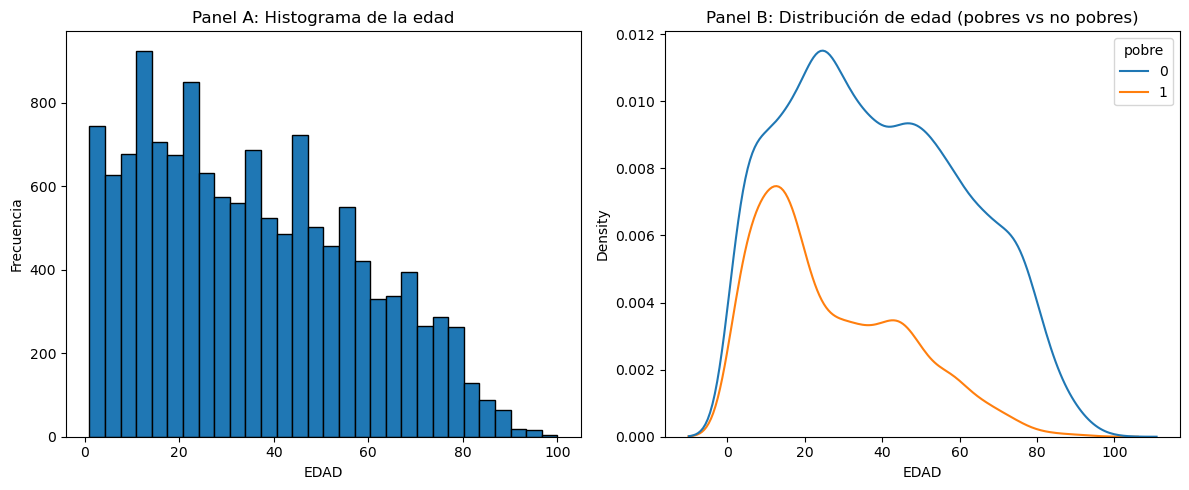

In [2036]:
# 1) Crear la variable edad^2
df_pobres["edad2"] = df_pobres["CH06"] ** 2

# 2) Gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: histograma de edad
axes[0].hist(df_pobres["CH06"].dropna(), bins=30, edgecolor="black")
axes[0].set_title("Panel A: Histograma de la edad")
axes[0].set_xlabel("EDAD")
axes[0].set_ylabel("Frecuencia")

# Panel B: kernel density por condición de pobreza
sns.kdeplot(data=df_pobres, x="CH06", hue="pobre", ax=axes[1], fill=False)
axes[1].set_title("Panel B: Distribución de edad (pobres vs no pobres)")
axes[1].set_xlabel("EDAD")

plt.tight_layout()
plt.show()

In [2037]:
# --- 0) Limpieza de tipos ---
for c in ["CH12", "CH13", "CH14"]:
    if c in df_pobres.columns:
        df_pobres[c] = pd.to_numeric(df_pobres[c], errors="coerce")

# --- 1) Diccionario de máximos de años si FINALIZÓ el nivel ---
max_anios = {
    1: 0,    # Jardín / preescolar
    2: 6,    # Primario completo
    3: 9,    # EGB completo
    4: 12,   # Secundario completo
    5: 12,   # Polimodal completo
    6: 15,   # Terciario completo
    7: 17,   # Universitario completo
    8: 19,   # Posgrado completo
    9: np.nan  # Educación especial (no comparable)
}

# --- 2) Años si NO finalizó (usa CH14 con topes realistas) ---
def años_incompletos(nivel, ch14):
    if pd.isna(ch14) or ch14 == 98:   # 98 = educación especial
        return np.nan
    y = int(ch14)

    if nivel == 1: return 0
    if nivel == 2: return np.clip(y, 0, 6)            # Primario
    if nivel == 3: return np.clip(y, 0, 9)            # EGB
    if nivel == 4: return 6 + np.clip(y, 0, 5)        # Secundario
    if nivel == 5: return 9 + np.clip(y, 0, 3)        # Polimodal
    if nivel == 6: return 12 + np.clip(y, 0, 3)       # Terciario
    if nivel == 7: return 12 + np.clip(y, 0, 5)       # Universitario
    if nivel == 8: return 17 + np.clip(y, 0, 2)       # Posgrado
    if nivel == 9: return np.nan                      # Educación especial
    return np.nan

# --- 3) Función principal ---
def calcular_educ(fila):
    nivel = fila.get("CH12", np.nan)
    fin   = fila.get("CH13", np.nan)  # 1 sí, 2 no
    ch14  = fila.get("CH14", np.nan)

    if pd.isna(nivel): return np.nan
    if nivel == 9: return np.nan
    if pd.isna(fin): return np.nan

    if fin == 1:   # Finalizó
        return max_anios.get(nivel, np.nan)
    if fin == 2:   # No finalizó
        return años_incompletos(nivel, ch14)

    return np.nan

# --- 4) Crear variable educ ---
df_pobres["educ"] = df_pobres.apply(calcular_educ, axis=1)

# --- 5) Chequeo ---
print("\nResumen de educ:\n", df_pobres["educ"].describe())
print("")
df_pobres[["CH12","CH13","CH14","educ"]].sample(10)



Resumen de educ:
 count   12,799.00
mean         9.05
std          4.75
min          0.00
25%          6.00
50%          9.00
75%         12.00
max         19.00
Name: educ, dtype: float64



,CH12,CH13,CH14,educ
1495,4,1,<NA>,12.00
7590,7,1,<NA>,17.00
4774,2,1,<NA>,6.00
15064,4,2,4,10.00
4536,4,2,1,7.00
2964,6,1,<NA>,15.00
15194,4,2,3,9.00
5685,2,1,<NA>,6.00
5248,0,0,<NA>,NaN
2937,2,1,<NA>,6.00


In [2038]:
df_pobres

,CODUSU,COMPONENTE,ANO4,CH03,CH04,CH06,CH07,CH08,CH09,CH10,...,PP3E_TOT,PP3F_TOT,edad2,horastrab,educ,IX_TOT,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,125098,1,2005,1,1,80,4,1,1,2,...,0,0,6400,0,8.00,1,0.74,0.74,151.75,0
1,125188,1,2005,1,1,26,2,4,1,2,...,20,0,676,20,12.00,3,1.02,1.78,365.02,0
2,125188,2,2005,2,2,27,2,4,1,2,...,0,0,729,0,15.00,3,0.76,1.78,365.02,0
3,125188,3,2005,3,2,<NA>,5,4,3,0,...,0,0,<NA>,0,NaN,3,NaN,1.78,365.02,0
4,125242,1,2005,1,2,71,4,1,1,2,...,0,0,5041,0,6.00,1,0.67,0.67,137.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16653,TQRMNOUSSHMKPRCDEIJAH00882495,3,2025,3,1,7,5,4,1,1,...,<NA>,<NA>,49,<NA>,2.00,4,0.66,3.20,"1,168,566.40",1
16654,TQRMNOUSSHMKPRCDEIJAH00882495,4,2025,3,2,15,5,1,1,1,...,<NA>,<NA>,225,<NA>,10.00,4,0.77,3.20,"1,168,566.40",1
16655,TQRMNOPTQHKKPQCDEIJAH00860461,1,2025,1,2,37,5,1,1,1,...,0,0,1369,0,18.00,3,0.77,2.31,"843,558.87",0
16656,TQRMNOPTQHKKPQCDEIJAH00860461,2,2025,8,2,31,5,1,1,2,...,<NA>,<NA>,961,<NA>,6.00,3,0.77,2.31,"843,558.87",0


In [2039]:
#separamos la df_pobres en dos bases par cada año
pobres05 = df_pobres[df_pobres["ANO4"] == 2005]
pobres25 = df_pobres[df_pobres["ANO4"] == 2025]

In [2040]:
#calculamos la inflacion a aprtir de las CBT de pobreza del TP1
cbt05 = 205.07
cbt25 = 365177
inflacion = round(cbt25/cbt05,2)
inflacion

1780.74

In [2041]:
df_pobres.dtypes

CODUSU                object
COMPONENTE             Int64
ANO4                   Int64
CH03                   Int64
CH04                   Int64
CH06                   Int64
CH07                   Int64
CH08                   Int64
CH09                   Int64
CH10                   Int64
CH11                   Int64
CH12                   Int64
CH13                   Int64
CH14                   Int64
CH15                   Int64
CH16                   Int64
NIVEL_ED               Int64
ESTADO                 Int64
CAT_INAC               Int64
CAT_OCUP               Int64
IPCF                 float64
ITF                    Int64
PP3E_TOT               Int64
PP3F_TOT               Int64
edad2                  Int64
horastrab              Int64
educ                 float64
IX_TOT                 int64
adulto_equiv         float64
ad_equiv_hogar       float64
ingreso_necesario    float64
pobre                  int32
dtype: object

In [2042]:
#modificamos ITF 2005
#Creamos una nueva columna para guardar el ITF ajustado a 2025
# Copiamos ITF en float
df_pobres["ITF25"] = df_pobres["ITF"].astype(float)

# Multiplicamos solo los del 2005
df_pobres.loc[df_pobres["ANO4"] == 2005, "ITF25"] = (
    df_pobres.loc[df_pobres["ANO4"] == 2005, "ITF25"] * 1780.74
)

# Chequeo
print("\nITF25:\n", df_pobres["ITF25"].describe())
df_pobres[["ANO4", "ITF", "ITF25"]].sample(10)


ITF25:
 count       13,680.00
mean     2,442,485.60
std      2,932,142.41
min         17,807.40
25%      1,000,000.00
50%      1,750,000.00
75%      3,027,258.00
max     92,687,517.00
Name: ITF25, dtype: float64


,ANO4,ITF,ITF25
8817,2005,1700,"3,027,258.00"
13906,2025,1227000,"1,227,000.00"
6015,2005,600,"1,068,444.00"
4041,2005,500,"890,370.00"
1487,2005,530,"943,792.20"
8512,2005,2751,"4,898,815.74"
3673,2005,1150,"2,047,851.00"
16321,2025,400000,"400,000.00"
4253,2005,1200,"2,136,888.00"
5782,2005,1430,"2,546,458.20"


In [2043]:
#volvemos a definir el ingreso necesario a aprtir de ITF25
df_pobres["ingreso_necesario25"] =  365177 * df_pobres["ad_equiv_hogar"]


#definimos la linea de pobreze como la mediana del ingreso necesario
lineap = float(df_pobres["ingreso_necesario25"].median())
print("Linea de pobreza:",lineap)
print("")
print(df_pobres["ingreso_necesario25"].describe())
print(df_pobres.shape)

Linea de pobreza: 1117441.62

count      13,680.00
mean    1,174,565.39
std       586,812.52
min       230,061.51
25%       763,219.93
50%     1,117,441.62
75%     1,478,966.85
max     3,688,287.70
Name: ingreso_necesario25, dtype: float64
(13680, 34)


In [2044]:
#df_pobres[["ANO4","ingreso_necesario25", "ingreso_necesario", "ad_equiv_hogar"]].sample(10)

In [2045]:
#usamos la regla freeman daconis para calcular la cantidad de bins
print(df_pobres["ITF25"].describe())
#bins = 542 aprox

count       13,680.00
mean     2,442,485.60
std      2,932,142.41
min         17,807.40
25%      1,000,000.00
50%      1,750,000.00
75%      3,027,258.00
max     92,687,517.00
Name: ITF25, dtype: float64


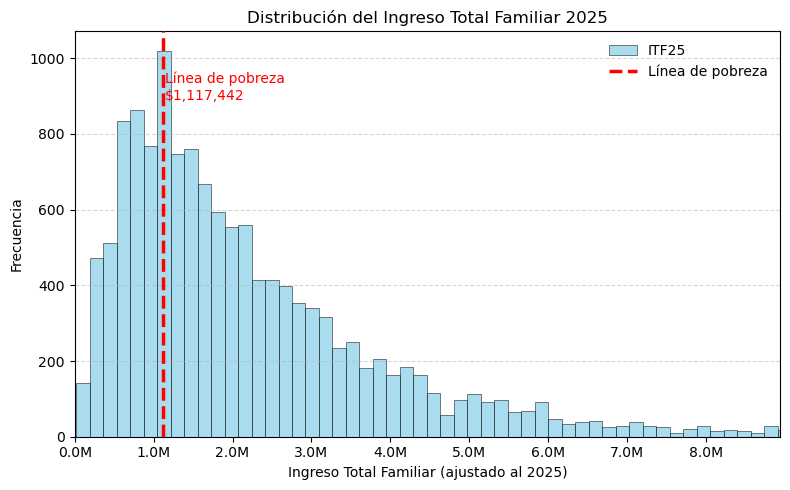

In [2046]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formateador para mostrar millones en el eje X
def millones(x, pos):
    return f"{x/1_000_000:.1f}M"

plt.figure(figsize=(8,5))
ax = df_pobres["ITF25"].plot(
    kind="hist",
    bins=542,
    color="skyblue",
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5
)

# Ajustar rango del eje X
ax.set_xlim(0, float(lineap) * 8)

# Dibujar la línea de pobreza
ax.axvline(float(lineap), color="red", linestyle="--",
           linewidth=2.5, zorder=5, label="Línea de pobreza")

# Anotación con el valor de la línea
ax.text(
    float(lineap) * 1.02,        # un poquito a la derecha de la línea
    ax.get_ylim()[1] * 0.9,      # cerca del tope del gráfico
    f"Línea de pobreza\n${float(lineap):,.0f}",
    color="red",
    fontsize=10,
    va="top"
)

# Grid discreto en Y
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Formatear eje X en millones
ax.xaxis.set_major_formatter(FuncFormatter(millones))

# Títulos y etiquetas
ax.set_title("Distribución del Ingreso Total Familiar 2025")
ax.set_xlabel("Ingreso Total Familiar (ajustado al 2025)")
ax.set_ylabel("Frecuencia")

# Leyenda
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()
plt.show()


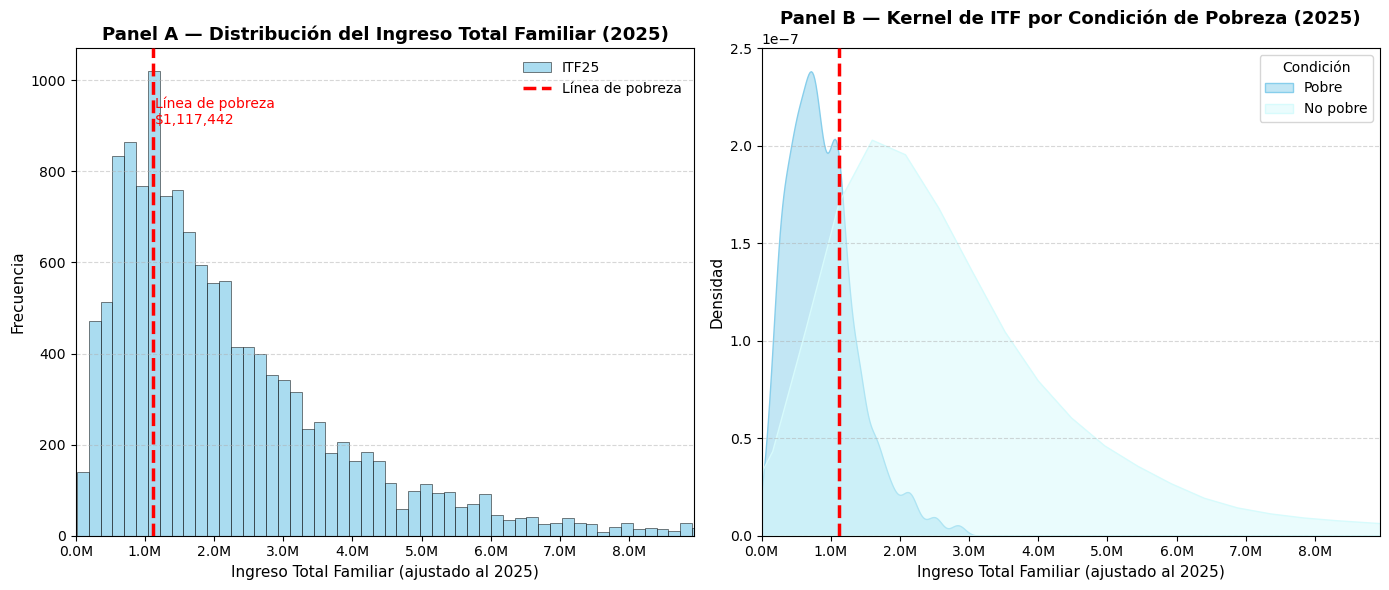

In [2047]:
# Formateador para mostrar millones en el eje X
def millones(x, pos):
    return f"{x/1_000_000:.1f}M"

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ==========================
# PANEL A: HISTOGRAMA DE ITF
# ==========================
ax = df_pobres["ITF25"].plot(
    kind="hist",
    bins=542,  # podés cambiar o calcular con Freedman–Diaconis
    color="skyblue",
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5,
    ax=axes[0]
)

# Ajustar rango del eje X
ax.set_xlim(0, float(lineap) * 8)

# Línea de pobreza
ax.axvline(float(lineap), color="red", linestyle="--",
           linewidth=2.5, zorder=5, label="Línea de pobreza")

# Anotación con valor
ax.text(
    float(lineap) * 1.02,
    ax.get_ylim()[1] * 0.9,
    f"Línea de pobreza\n${float(lineap):,.0f}",
    color="red",
    fontsize=10,
    va="top"
)

# Grid y formato
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.xaxis.set_major_formatter(FuncFormatter(millones))

# Títulos y etiquetas
ax.set_title("Panel A — Distribución del Ingreso Total Familiar (2025)", fontsize=13, weight="bold")
ax.set_xlabel("Ingreso Total Familiar (ajustado al 2025)", fontsize=11)
ax.set_ylabel("Frecuencia", fontsize=11)
ax.legend(loc="upper right", frameon=False)

# ====================================
# PANEL B: KERNEL DE ITF POR POBRE/NO
# ====================================
import seaborn as sns

sns.kdeplot(
    data=df_pobres,
    x="ITF25",
    hue="pobre",
    palette={1: "#87CEEB", 0: "#d7fbfc"},
    fill=True,
    alpha=0.5,
    ax=axes[1]
)

# Línea de pobreza
axes[1].axvline(float(lineap), color="red", linestyle="--",
           linewidth=2.5, zorder=5, label="Línea de pobreza")

# Forzar el mismo límite que en Panel A
axes[1].set_xlim(0, float(lineap) * 8)

# Grid y formato
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].xaxis.set_major_formatter(FuncFormatter(millones))

# Títulos y etiquetas
axes[1].set_title("Panel B — Kernel de ITF por Condición de Pobreza (2025)", fontsize=13, weight="bold")
axes[1].set_xlabel("Ingreso Total Familiar (ajustado al 2025)", fontsize=11)
axes[1].set_ylabel("Densidad", fontsize=11)
axes[1].legend(title="Condición", labels=["Pobre", "No pobre"])

plt.tight_layout()
plt.show()

In [2048]:
df.columns

Index(['CODUSU', 'COMPONENTE', 'ANO4', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08',
       'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16',
       'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'IPCF', 'ITF', 'PP3E_TOT',
       'PP3F_TOT', 'edad2', 'horastrab', 'educ', 'IX_TOT', 'adulto_equiv',
       'ad_equiv_hogar'],
      dtype='object')

In [2049]:
pd.set_option("display.float_format", "{:,.2f}".format)
df["ingreso_necesario"] = np.where(
    df["ANO4"] == 2025,
    365177 * df["ad_equiv_hogar"],
    np.where(
        df["ANO4"] == 2005,
        205.07 * df["ad_equiv_hogar"],
        np.nan  # por si hay otros años distintos
    )
)

columnas_interes = ['ANO4', 'ingreso_necesario', 'ad_equiv_hogar']
df[columnas_interes].sample(10)

,ANO4,ingreso_necesario,ad_equiv_hogar
3225,2005,557.79,2.72
9315,2005,"1,017.15",4.96
428,2005,362.97,1.77
16336,2025,"500,292.49",1.37
11204,2025,"650,015.06",1.78
16435,2025,"839,907.10",2.30
9624,2025,"522,203.11",1.43
5294,2005,520.88,2.54
1860,2005,711.59,3.47
12241,2025,"978,674.36",2.68


In [2050]:
df["pobre"] = np.where(
    df["ITF"] == 0, 
    np.nan,  # si ITF es 0 → faltante
    (df["ITF"] < df["ingreso_necesario"]).astype(int)  # si no → 1 si pobre, 0 si no pobre
)

columnas_interes = ['ANO4', 'ingreso_necesario', 'ad_equiv_hogar', 'pobre', 'ITF']
df[columnas_interes].sample(10)

,ANO4,ingreso_necesario,ad_equiv_hogar,pobre,ITF
10195,2025,"1,544,698.71",4.23,NaN,0
23,2005,674.68,3.29,0.00,7800
4988,2005,"1,626.21",7.93,1.00,460
15392,2025,"573,327.89",1.57,0.00,838000
3792,2005,721.85,3.52,1.00,350
8650,2005,440.90,2.15,0.00,860
1114,2005,803.87,3.92,1.00,450
7050,2005,360.92,1.76,0.00,2420
13833,2025,"1,296,378.35",3.55,0.00,1600000
11858,2025,"642,711.52",1.76,NaN,0


In [2051]:
df['ITF'].isna().any()

False

In [2052]:
#creamos variable horastrab en el df
df_pobres['horastrab'] = df_pobres['PP3E_TOT'] + df_pobres['PP3F_TOT']
print("horastrab:\n", df_pobres["horastrab"].describe())
print("")

df_pobres[['horastrab','PP3E_TOT','PP3F_TOT','CH03']].sample(10)

horastrab:
 count   11,248.00
mean        18.57
std         23.88
min          0.00
25%          0.00
50%          0.00
75%         40.00
max        126.00
Name: horastrab, dtype: Float64



,horastrab,PP3E_TOT,PP3F_TOT,CH03
4539,0,0,0,3
2139,57,57,0,1
800,0,0,0,3
1110,0,0,0,1
8533,2,2,0,3
5850,0,0,0,1
12583,<NA>,<NA>,<NA>,3
14573,<NA>,<NA>,<NA>,3
9631,36,36,0,1
533,0,0,0,1


In [2053]:
#estadística descriptiva
# Filtrar solo CH03 == 1
trabsubset = df[df["CH03"] == 1]["horastrab"].dropna()

# Calcular estadísticos
stats = {
    "Promedio": round(trabsubset.mean(), 2),
    "Desvío estándar": round(trabsubset.std(), 2),
    "Mínimo": round(trabsubset.min(), 2),
    "Mediana": round(trabsubset.median(), 2),
    "Máximo": round(trabsubset.max(), 2)
}

# Pasar a DataFrame para que quede prolijo
tabla = pd.DataFrame(stats, index=["horastrab"]).T
display(tabla)

,horastrab
Promedio,30.61
Desvío estándar,24.74
Mínimo,0.00
Mediana,36.00
Máximo,119.00


In [2054]:
# Crear estructura vacía
resumen = {
    "2005": {},
    "2025": {},
    "TOTAL": {}
}

# --- 1) Cantidad observaciones ---
resumen["2005"]["Obs"]   = (df_pobres["ANO4"] == 2005).sum()
resumen["2025"]["Obs"]   = (df_pobres["ANO4"] == 2025).sum()
resumen["TOTAL"]["Obs"]  = len(df_pobres)

# --- 2) Cantidad de NAs en "pobre" ---
resumen["2005"]["NAs en pobre"]   = df_pobres.loc[df_pobres["ANO4"] == 2005, "pobre"].isna().sum()
resumen["2025"]["NAs en pobre"]   = df_pobres.loc[df_pobres["ANO4"] == 2025, "pobre"].isna().sum()
resumen["TOTAL"]["NAs en pobre"]  = df_pobres["pobre"].isna().sum()

# --- 3) Cantidad de pobres (pobre==1) ---
resumen["2005"]["Pobres"]   = (df_pobres.loc[df_pobres["ANO4"] == 2005, "pobre"] == 1).sum()
resumen["2025"]["Pobres"]   = (df_pobres.loc[df_pobres["ANO4"] == 2025, "pobre"] == 1).sum()
resumen["TOTAL"]["Pobres"]  = (df_pobres["pobre"] == 1).sum()

# --- 4) Cantidad de no pobres (pobre==0) ---
resumen["2005"]["No pobres"]   = (df_pobres.loc[df_pobres["ANO4"] == 2005, "pobre"] == 0).sum()
resumen["2025"]["No pobres"]   = (df_pobres.loc[df_pobres["ANO4"] == 2025, "pobre"] == 0).sum()
resumen["TOTAL"]["No pobres"]  = (df_pobres["pobre"] == 0).sum()

# --- 5) Cantidad de variables (columnas) limpias y homogeneizadas ---
# (Asumimos que ya está tu df final limpio y homogeneizado)
num_vars = df_pobres.shape[1]
resumen["2005"]["Variables"] = num_vars
resumen["2025"]["Variables"] = num_vars
resumen["TOTAL"]["Variables"] = num_vars

# Convertir a DataFrame
tabla_resumen = pd.DataFrame(resumen)
print(tabla_resumen)

              2005  2025  TOTAL
Obs           9371  4309  13680
NAs en pobre     0     0      0
Pobres        2485  1334   3819
No pobres     6886  2975   9861
Variables       34    34     34


In [2055]:
df["IX_TOT"] = df.groupby("CODUSU")["CODUSU"].transform("size")
print("IX_TOT (Cantidad de miembros del hogar):",df_pobres["IX_TOT"].describe())

IX_TOT (Cantidad de miembros del hogar): count   13,680.00
mean         4.05
std          2.04
min          1.00
25%          3.00
50%          4.00
75%          5.00
max         12.00
Name: IX_TOT, dtype: float64


In [2056]:
#definimos las variables
predictores = ['CH06', 'edad2', 'educ', 'ITF25', 'IX_TOT', 'horastrab']

corr_matrix = df_pobres[predictores].corr()
print(corr_matrix)

           CH06  edad2  educ  ITF25  IX_TOT  horastrab
CH06       1.00   0.96  0.25  -0.01   -0.43       0.17
edad2      0.96   1.00  0.11  -0.04   -0.42       0.03
educ       0.25   0.11  1.00   0.19   -0.25       0.30
ITF25     -0.01  -0.04  0.19   1.00    0.05       0.08
IX_TOT    -0.43  -0.42 -0.25   0.05    1.00      -0.13
horastrab  0.17   0.03  0.30   0.08   -0.13       1.00


# TP 3

# A. Enfoque de validación.

VARIABLES:
- CODUSU: Código para distinguir VIVIENDAS, permite aparearlas con Hogares y Personas. Además permite hacer el seguimiento a través de los trimestres
- COMPONENTE: Num identificador
- ANO4: Año
- CH03: Relación de parentesco
- CH04: Sexo
- CH06: Edad en años
- edad2: Edad^2
- CH07: Estado civil
- CH08: Cobertura médica
- CH09: ¿Sabe leer y escribir?
- CH10: ¿Asiste o asistió a algún establecimiento educativo? (colegio, escuela,universidad)
- CH11: Ese establecimiento es...
- CH12: ¿Cuál es el nivel más alto que cursa o cursó?
- CH13: ¿Finalizó ese nivel?
- CH14: ¿Cuál fue el último año que aprobó?
- CH15: ¿Dónde nació?
- CH16: ¿Dónde vivía hace 5 años?
- NIVEL_ED: Nivel educativo
- educ: Años de educación
- ESTADO: Condición de actividad
- CAT_INAC: Categoría de inactividad
- CAT_OCUP: Categoria ocupacional
- IPCF: Ingreso per cápita familiar
- ITF: Monto del ingreso total familiar
- ITF25: Ingreso Familiar
- PP3E_TOT: Total de horas que trabajó en la semana en la ocupación principal
- PP3F_TOT: Total de horas que trabajó en la semana en otras ocupaciones
- adulto_equiv: equivalencia energetica que tiene cada persona a partir de su edad y genero
- ad_equiv_hogar: la sumatoria de las equivalencias de cada hogar
- ingreso_necesario: ingreso necesario por hogar, a partir de sus necesiddes energeticas, para no ser considerado pobre
- pobre: Variable dummy pobre 1 no pobre 0
- ingreso_necesario25: ingreso necesario por hogar, a partir de sus necesiddes energeticas, para no ser conciderado pobre (ajustado al 2025)
- horastrab: Horas trabajadas
- IX_TOT: Num Miembros del hogar

In [2512]:
df_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2514]:
#vamos a trabajar con el df completo respondieron y no respondieron
#df.columns #la variable ITF y las asociadas (ITF25, ingreso_necesario, ingreso_necesario25) no estan disponibles en este df ya que las observaciones no_respondieron no reportaron su ingreso

In [2516]:
# Dimensión de la base
#print("Dimensión del dataframe:", df.shape)
#print("")

# Variables e información
#print(auto.dtypes)
#print(df.info())

#df.head()

In [2518]:
#vemos si hay duplicados
#print("Duplicados:", df.duplicated().sum())

In [2519]:
# Hay valores faltantes?
#print("\n Missings:\n", df.isnull().sum()) # conteo

In [2520]:
#continuas = ["CH06","IPCF","ITF","PP3E_TOT","PP3F_TOT","IX_TOT","educ","horastrab","adulto_equiv","ad_equiv_hogar"]

# Le cambiamos el formato a la salida de la estadistica descriptiva 
#pd.set_option('display.float_format', lambda x: '%.2f' % x) # prueben con '%.5f', como luce?

# Inspección rápida de las variables y sus valores
#df[continuas].describe()

In [2521]:
#df.columns

In [2522]:
#vemos los valores que toman las variables
#df_values = df[["CH04", "CH07", "CH08", "CH09", "CH11", "CH15", "CH16", "ESTADO"]]

#for col in df_values.columns:
    #print(f"\nConteo de respuestas en {col}:")
    #print(df_values[col].value_counts(dropna=False))

In [2523]:
#creamos mas dummies con pd.get_dummies()

CH07_dummies = pd.get_dummies(df['CH07'], prefix='CH07', dummy_na=True, dtype=int)
CH11_dummies = pd.get_dummies(df['CH11'], prefix='CH11', dummy_na=True, dtype=int)
ESTADO_dummies = pd.get_dummies(df['ESTADO'], prefix='ESTADO', dummy_na=True, dtype=int)

df_dummies = pd.concat([df, CH07_dummies, CH11_dummies, ESTADO_dummies], axis=1)

#CH07_dummies
#CH11_dummies.sample(10)
ESTADO_dummies

,ESTADO_1,ESTADO_2,ESTADO_3,ESTADO_4,ESTADO_<NA>
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
16660,1,0,0,0,0
16661,1,0,0,0,0
16662,1,0,0,0,0
16663,0,0,1,0,0


In [2524]:
#CH08 Dummy
#reducimos la variable CH08 a 3 dummies
df_dummies['CH08_1'] = df['CH08'].astype(str).apply(lambda x: 1 if '1' in x else 0) # Obra social (incluye PAMI)
df_dummies['CH08_2'] = df['CH08'].astype(str).apply(lambda x: 1 if '2' in x else 0) # Mutual/prepaga/servicio de emergencia
df_dummies['CH08_3'] = df['CH08'].astype(str).apply(lambda x: 1 if '3' in x else 0) # Planes y seguros públicos

# Indicador de faltante en la variable original con una cuarta dummy
df_dummies['CH08_<NA>'] = df['CH08'].isna().astype(int)

#df["CH16"].value_counts(dropna=False)
#df[['CH08','CH08_1','CH08_2','CH08_3','CH08_missing']].sample(20)

In [2525]:
#CH09 Dummy
# Crear las dummies
df_dummies['CH09_1'] = df['CH09'].apply(lambda x: 1 if x == 1 else 0)  # sabe leer y escribir

# Crear dummy de missing (menor de 2 años o NaN)
df_dummies['CH09_<NA>'] = df['CH09'].apply(lambda x: 1 if (pd.isna(x) or x == 3) else 0)

#df["CH09"].value_counts(dropna=False)
#df[['CH09','CH09_1','CH09_missing']].sample(20)

In [2526]:
#CH16 Dummy
# Crear las dummies según tu lógica
df_dummies['CH16_1'] = df['CH16'].apply(lambda x: 1 if x in [1, 2] else 0)  # Misma provincia
df_dummies['CH16_2'] = df['CH16'].apply(lambda x: 1 if x == 3 else 0)       # Otra provincia
df_dummies['CH16_3'] = df['CH16'].apply(lambda x: 1 if x in [4, 5] else 0)  # Otro país

# Crear la dummy de faltante
df_dummies['CH16_<NA>'] = df['CH16'].isna().astype(int)

#df["CH16"].value_counts(dropna=False)
#df[['CH16','CH16_1','CH16_2','CH16_3','CH16_missing']].sample(20)

In [2527]:
#vemos con que columnas nos quedamos
df_dummies.columns

cols_drop = [
    'CH03', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15',
    'NIVEL_ED', 'CH16', 'ESTADO', 'CAT_INAC', 'CAT_OCUP', 'IPCF',
    'PP3E_TOT', 'PP3F_TOT', 'edad2', 'horastrab', 'adulto_equiv', 'ad_equiv_hogar',
    'CH07_5', 'CH11_0', 'ESTADO_4'
]

# dropeamos las variables que no vamos a usar + 1 de las columnas por variable pd.get_dummies()
df_d_ITF_ANO4 = df_dummies.drop(columns=cols_drop, errors='ignore')

df_d_ITF_ANO4.sample(10)

,CODUSU,COMPONENTE,ANO4,CH04,CH06,ITF,educ,IX_TOT,ingreso_necesario,pobre,...,CH08_1,CH08_2,CH08_3,CH08_<NA>,CH09_1,CH09_<NA>,CH16_1,CH16_2,CH16_3,CH16_<NA>
14236,TQRMNORRUHKLNNCDEIIAD00881164,2,2025,2,35,4500000,15.00,4,"1,048,057.99",0.00,...,1,0,0,0,1,0,1,0,0,0
2018,266790,1,2005,1,25,1638,12.00,2,365.02,0.00,...,1,0,0,0,1,0,1,0,0,0
14777,TQRMNORVUHKMKQCDEIJAH00881544,2,2025,1,42,0,12.00,3,"887,380.11",NaN,...,1,0,0,0,1,0,1,0,0,0
8509,265469,3,2005,2,29,2751,8.00,6,"1,074.57",0.00,...,1,0,0,0,1,0,1,0,0,0
10300,TQRMNOSSWHKOMSCDEIJAH00856761,2,2025,2,47,2400000,16.00,4,"1,135,700.47",0.00,...,1,0,0,0,1,0,1,0,0,0
56,128340,2,2005,2,46,600,12.00,2,311.71,0.00,...,0,0,0,0,1,0,1,0,0,0
14505,TQRMNOQRXHJMNLCDEIJAH00873098,4,2025,1,5,2080000,0.00,4,"1,121,093.39",0.00,...,0,0,0,0,1,0,1,0,0,0
5746,201487,3,2005,1,25,1700,12.00,2,346.57,0.00,...,1,0,0,0,1,0,1,0,0,0
12778,TQRMNOTYXHMMLMCDEIJAH00879978,5,2025,1,8,0,2.00,6,"1,814,929.69",NaN,...,0,0,0,0,1,0,1,0,0,0
8220,258877,4,2005,2,52,100,6.00,4,650.07,1.00,...,0,0,0,0,1,0,1,0,0,0


In [2528]:
norespondieron_d_ITF_ANO4 = df_d_ITF_ANO4[df_d_ITF_ANO4['ITF']==0]
respondieron_d_ITF_ANO4 = df_d_ITF_ANO4[df_d_ITF_ANO4['ITF']!=0]

In [2529]:
norespondieron05_d_ITF_ANO4 = norespondieron_d_ITF_ANO4[norespondieron_d_ITF_ANO4['ANO4']==2005]
norespondieron25_d_ITF_ANO4 = norespondieron_d_ITF_ANO4[norespondieron_d_ITF_ANO4['ANO4']==2025]
respondieron05_d_ITF_ANO4 = respondieron_d_ITF_ANO4[respondieron_d_ITF_ANO4['ANO4']==2005]
respondieron25_d_ITF_ANO4 = respondieron_d_ITF_ANO4[respondieron_d_ITF_ANO4['ANO4']==2025]

In [2530]:
df_d = df_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')

norespondieron_d = norespondieron_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')
respondieron_d = respondieron_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')

In [2531]:
respondieron_d = respondieron_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

respondieron_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2532]:
norespondieron05_d = norespondieron05_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')
norespondieron25_d = norespondieron25_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')
respondieron05_d = respondieron05_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')
respondieron25_d = respondieron25_d_ITF_ANO4.drop(columns=['ANO4','ITF'], errors='ignore')

print("Bases de datos completa")
print(df_d.shape)

print("\nBases de datos NO respondieron")
print(norespondieron_d.shape)
print("2005:",norespondieron05_d.shape)
print("2025:",norespondieron25_d.shape)

print("\nBases de datos Respondieorn")
print(respondieron_d.shape)
print("2005:",respondieron05_d.shape)
print("2025:",respondieron25_d.shape)


Bases de datos completa
(16665, 30)

Bases de datos NO respondieron
(2985, 30)
2005: (113, 30)
2025: (2872, 30)

Bases de datos Respondieorn
(13680, 30)
2005: (9371, 30)
2025: (4309, 30)


In [2533]:
respondieron05_d = respondieron05_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

respondieron05_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2534]:
respondieron05_d = respondieron05_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

respondieron05_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2552]:
respondieron25_d = respondieron25_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

respondieron25_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2553]:
norespondieron25_d = respondieron_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

norespondieron25_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2554]:
df_d = df_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

df_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [2555]:
#juntamos los predictores en un vector
predictores = ['Sexo', 'Edad', 'Educ', 'HorasTrab',
       'Unido', 'Casado', 'Divorciado', 'Viudo', 'EducPub',
       'EducPriv', 'EducNan', 'Ocupado', 'Desocupado', 'Inactivo',
       'ObraSocial', 'Emergencias', 'SeguroPublico', 'CoberturaNan', 'Leer', 'Provincia', 'Nacional', 'Internacional','ingreso_necesario']

# Guardo los vectores de variable dependiente y de variable independiente respectivamente:
y05 = respondieron05_d['pobre']
X05 = respondieron05_d[predictores]

y25 = respondieron25_d['pobre']
X25 = respondieron25_d[predictores]

In [2556]:
# Parto la base en dos y transformo el vector x: 
x_train05, x_test05, y_train05, y_test05 = train_test_split(X05, y05, test_size = 0.3, random_state = 444)

In [2557]:
# Parto la base en dos y transformo el vector x: 
x_train25, x_test25, y_train25, y_test25 = train_test_split(X25, y25, test_size = 0.3, random_state = 444)

In [2558]:
x_train.columns

Index(['Sexo', 'Edad', 'Educ', 'HorasTrab', 'Unido', 'Casado', 'Divorciado',
       'Viudo', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'Provincia', 'Nacional', 'Internacional',
       'ingreso_necesario'],
      dtype='object')

In [2559]:
# Siempre chequear que la base de entrenamiento (train) y de testeo (test) sean realmente aleatorias. Una forma es mirar la estadística descriptiva:
# Crear una tabla con medias y p-valores
resultados05 = []

for col in x_train05.columns:
    # Evitar columnas no numéricas
    if pd.api.types.is_numeric_dtype(x_train05[col]):
        stat, p = ttest_ind(x_train05[col], x_test05[col], equal_var=False, nan_policy='omit')
        resultados05.append({
            'variable': col,
            'mean_train': x_train05[col].mean(),
            'mean_test': x_test05[col].mean(),
            'diff': x_train05[col].mean() - x_test05[col].mean(),
            'p_value': p
        })

tabla_significancia = pd.DataFrame(resultados05)
tabla_significancia['significativa'] = tabla_significancia['p_value'] < 0.05

tabla_significancia.style.format({
    'mean_train': '{:,.3f}',
    'mean_test': '{:,.3f}',
    'diff': '{:,.3f}',
    'p_value': '{:.4f}'
}).background_gradient(subset=['p_value'], cmap='RdYlGn') \
  .set_caption("Comparación de medias entre Train y Test (t-test)")

    #son muestras aleatorias :)

,variable,mean_train,mean_test,diff,p_value,significativa
0,Sexo,1.522,1.533,-0.011,0.3220,False
1,Edad,34.493,33.994,0.500,0.3237,False
2,Educ,8.475,8.682,-0.207,0.0595,False
3,HorasTrab,4.324,4.318,0.006,0.8986,False
4,Unido,0.113,0.103,0.010,0.1356,False
5,Casado,0.302,0.310,-0.008,0.4466,False
6,Divorciado,0.045,0.048,-0.003,0.5683,False
7,Viudo,0.063,0.055,0.008,0.1387,False
8,EducPub,0.209,0.204,0.004,0.6299,False
9,EducPriv,0.089,0.094,-0.005,0.4263,False


In [2560]:
# Siempre chequear que la base de entrenamiento (train) y de testeo (test) sean realmente aleatorias. Una forma es mirar la estadística descriptiva:
# Crear una tabla con medias y p-valores
resultados25 = []

for col in x_train25.columns:
    # Evitar columnas no numéricas
    if pd.api.types.is_numeric_dtype(x_train25[col]):
        stat, p = ttest_ind(x_train25[col], x_test25[col], equal_var=False, nan_policy='omit')
        resultados25.append({
            'variable': col,
            'mean_train': x_train25[col].mean(),
            'mean_test': x_test25[col].mean(),
            'diff': x_train25[col].mean() - x_test[col].mean(),
            'p_value': p
        })

tabla_significancia = pd.DataFrame(resultados25)
tabla_significancia['significativa'] = tabla_significancia['p_value'] < 0.05

tabla_significancia.style.format({
    'mean_train': '{:,.3f}',
    'mean_test': '{:,.3f}',
    'diff': '{:,.3f}',
    'p_value': '{:.4f}'
}).background_gradient(subset=['p_value'], cmap='RdYlGn') \
  .set_caption("Comparación de medias entre Train y Test (t-test)")

    #son muestras aleatorias :)

,variable,mean_train,mean_test,diff,p_value,significativa
0,Sexo,1.525,1.520,-0.017,0.7924,False
1,Edad,37.154,37.823,1.593,0.3721,False
2,Educ,10.083,10.279,0.951,0.2231,False
3,HorasTrab,3.456,3.458,-0.575,0.9679,False
4,Unido,0.187,0.203,0.050,0.2484,False
5,Casado,0.201,0.210,-0.066,0.4842,False
6,Divorciado,0.070,0.069,0.014,0.9248,False
7,Viudo,0.055,0.048,-0.009,0.3510,False
8,EducPub,0.222,0.217,0.007,0.6836,False
9,EducPriv,0.096,0.087,0.008,0.3397,False


# B. Modelo de Regresion Logistica

## Estimación y Efectos Marginales: Estimen una Regresión Logística usando X_train. Exporten una tabla con: (i) los coeficientes estimados para cada variable, (ii) los errores estándar y (ii) los odd-ratios. Interpreten los resultados de la tabla. Hint: en la clase magistral 6 hay una ilustración de la tabla).

In [2563]:
x_train25.isna().any().any()
x_train25.isna().sum()[x_train.isna().sum() > 0]

Edad     14
Educ    144
dtype: int64

In [2564]:
x_train05.isna().any().any()
x_train05.isna().sum()[x_train.isna().sum() > 0]

Edad    102
Educ    472
dtype: int64

In [2565]:
# Filtramos filas sin faltantes en X ni en y
mask = x_train25.notna().all(axis=1) & y_train.notna()
x_tr25 = x_train25.loc[mask].copy()
y_tr25 = y_train25.loc[mask].copy()

# Conviertimos dtypes “extension”/boolean a numéricos puros
#     (esto evita que al pasar a NumPy queden como object)
x_tr25 = x_tr25.replace({True: 1, False: 0})
x_tr25 = x_tr25.apply(pd.to_numeric, errors='raise')  # si algo no es numérico, fallará aquí con mensaje claro

# Aseguramos tipos finales
x_tr25 = x_tr25.astype('float64')
y_tr25 = pd.to_numeric(y_tr25, errors='raise').astype('int64')

In [2566]:
# Filtramos filas sin faltantes en X ni en y
mask = x_train05.notna().all(axis=1) & y_train.notna()
x_tr05 = x_train05.loc[mask].copy()
y_tr05 = y_train05.loc[mask].copy()

# Conviertimos dtypes “extension”/boolean a numéricos puros
#     (esto evita que al pasar a NumPy queden como object)
x_tr05 = x_tr05.replace({True: 1, False: 0})
x_tr05 = x_tr05.apply(pd.to_numeric, errors='raise')  # si algo no es numérico, fallará aquí con mensaje claro

# Aseguramos tipos finales
x_tr05 = x_tr05.astype('float64')
y_tr05 = pd.to_numeric(y_tr05, errors='raise').astype('int64')

In [2567]:
print("dtypes X:\n", x_tr25.dtypes.value_counts())
print("dtype y:", y_tr25.dtype)

# ¿quedan NaN?
print("\n¿X tiene NaN?", x_tr25.isna().any().any())
print("¿y tiene NaN?", y_tr25.isna().any())

dtypes X:
 float64    23
Name: count, dtype: int64
dtype y: int64

¿X tiene NaN? False
¿y tiene NaN? False


In [2568]:
print("dtypes X:\n", x_tr05.dtypes.value_counts())
print("dtype y:", y_tr05.dtype)

# ¿quedan NaN?
print("\n¿X tiene NaN?", x_tr05.isna().any().any())
print("¿y tiene NaN?", y_tr05.isna().any())

dtypes X:
 float64    23
Name: count, dtype: int64
dtype y: int64

¿X tiene NaN? False
¿y tiene NaN? False


In [2569]:
#agregamos columna de 1 cosntante
x_tr_sm25 = sm.add_constant(x_tr25) 

In [2570]:
#agregamos columna de 1 cosntante
x_tr_sm05 = sm.add_constant(x_tr05) 

In [2571]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculo VIF para cada variable
vif_data25 = pd.DataFrame()
vif_data25["Variable"] = x_tr_sm25.columns
vif_data25["VIF"] = [variance_inflation_factor(x_tr_sm25.values, i)
                   for i in range(x_tr_sm25.shape[1])]

# ordeno de mayor a menor
vif_data25 = vif_data25.sort_values(by="VIF", ascending=False)
display(vif_data25)

,Variable,VIF
0,const,80.96
4,HorasTrab,30.11
23,ingreso_necesario,29.82
12,Ocupado,8.12
14,Inactivo,6.21
2,Edad,3.95
20,Provincia,2.95
9,EducPub,2.43
19,Leer,2.29
13,Desocupado,2.19


In [2572]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculo VIF para cada variable
vif_data05 = pd.DataFrame()
vif_data05["Variable"] = x_tr_sm05.columns
vif_data05["VIF"] = [variance_inflation_factor(x_tr_sm05.values, i)
                   for i in range(x_tr_sm05.shape[1])]

# ordeno de mayor a menor
vif_data05 = vif_data05.sort_values(by="VIF", ascending=False)
display(vif_data05)

,Variable,VIF
0,const,75.60
4,HorasTrab,23.31
23,ingreso_necesario,23.06
12,Ocupado,7.54
14,Inactivo,5.83
2,Edad,4.04
13,Desocupado,2.70
6,Casado,2.66
20,Provincia,2.63
9,EducPub,2.62


In [2573]:
#vemos que CivilNan y LeerNan son constantes asi que las sacamos
#x_tr_sm = x_tr_sm.drop(columns=['CivilNan','LeerNan'], errors='ignore')

In [2574]:
#x_tr_final = x_tr.copy()  # o la versión ya sin dummies redundantes y con escalado
#x_tr_sm = sm.add_constant(x_tr_final, has_constant='add')

In [2575]:
#sus = []
#is_dummy = x_tr_final.apply(lambda s: set(s.dropna().unique()) <= {0,1})
#for c in x_tr_final.columns[is_dummy]:
    #tab = pd.crosstab(x_tr_final[c], y_tr)
    # Heurística: clase ausente en alguna celda o muy baja frecuencia
    #if (tab.min().min() == 0) or (tab.values.min() <= 3):  # umbral chico
        #sus.append((c, tab))
#sus[:10]  # dummies sospechosas -> EstadoNan y ResidenciaNan

In [2576]:
#x_tr = x_tr.drop(columns=['EstadoNan', 'ResidenciaNan'])

In [2577]:
#x_tr_sm = sm.add_constant(x_tr, has_constant='add')

In [2578]:
x_tr25['ingreso_necesario']

13649   244,668.59
14087   825,300.02
15113   372,480.54
13822   650,015.06
10211   547,765.50
           ...    
12759   872,773.03
14852   609,845.59
16372   920,246.04
15046   244,668.59
10777   650,015.06
Name: ingreso_necesario, Length: 2014, dtype: float64

In [2579]:
x_tr05['ingreso_necesario']

5012   1,798.46
4915     664.43
1005     609.06
6701     734.15
7749     756.71
         ...   
6710     209.17
954      137.40
3358     691.09
9094     643.92
7646     875.65
Name: ingreso_necesario, Length: 4696, dtype: float64

In [2580]:
#reg logisitca
#agregamos columna de 1 cosntante
x_tr25 = sm.add_constant(x_tr25) 
logit_model25 = sm.Logit(y_tr25, x_tr25)
result25 = logit_model25.fit()
print(result25.summary2()) 
#print(result.summary2().as_latex())

         Current function value: 0.443112
         Iterations: 35
                               Results: Logit
Model:                  Logit               Method:              MLE        
Dependent Variable:     pobre               Pseudo R-squared:    0.289      
Date:                   2025-10-31 17:12    AIC:                 1832.8558  
No. Observations:       2014                BIC:                 1967.4449  
Df Model:               23                  Log-Likelihood:      -892.43    
Df Residuals:           1990                LL-Null:             -1254.5    
Converged:              0.0000              LLR p-value:         3.6553e-138
No. Iterations:         35.0000             Scale:               1.0000     
----------------------------------------------------------------------------
                   Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
----------------------------------------------------------------------------
const               0.2392     0.5112   0

C:\Users\Ramses\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [2581]:
#reg logisitca
#agregamos columna de 1 cosntante
x_tr05 = sm.add_constant(x_tr05) 
logit_model05 = sm.Logit(y_tr05, x_tr05)
result05 = logit_model05.fit()
print(result05.summary2()) 
#print(result.summary2().as_latex())

Optimization terminated successfully.
         Current function value: 0.416524
         Iterations 7
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: pobre            Pseudo R-squared: 0.262      
Date:               2025-10-31 17:12 AIC:              3959.9937  
No. Observations:   4696             BIC:              4114.9009  
Df Model:           23               Log-Likelihood:   -1956.0    
Df Residuals:       4672             LL-Null:          -2651.7    
Converged:          1.0000           LLR p-value:      4.5249e-280
No. Iterations:     7.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -2.6570   0.3494  -7.6037 0.0000 -3.3418 -1.9721
Sexo               0.0352   0.0858   0.4101 0.6817 -0

In [2582]:
x_tr25['Desocupado'].value_counts()

Desocupado
0.00    1924
1.00      90
Name: count, dtype: int64

In [2583]:
x_tr25 = x_tr25.drop(columns=['CoberturaNan','SeguroPublico','Desocupado'], errors='ignore')

In [2584]:
#Tabla
x_tr25 = sm.add_constant(x_tr25)
logit_model25 = sm.Logit(y_tr25, x_tr25)
result25 = logit_model25.fit()

# --- Crear la tabla con coeficientes, errores estándar y OR ---
tabla25 = pd.DataFrame({
    "Coeficiente": result25.params,
    "Error estándar": result25.bse,
    "Odds Ratio (e^β)": np.exp(result25.params)
}).round(3)

# Mostrar tabla ordenada por magnitud del coeficiente (opcional)
tabla25 = tabla25.reindex(tabla25["Coeficiente"].abs().sort_values(ascending=False).index)

# Mostrar con formato bonito
from IPython.display import display
display(tabla25.style
        .set_caption("Resultados de la regresión logística (muestra de testeo 2025)")
        .format(precision=3)
        .background_gradient(subset=["Coeficiente"], cmap="RdBu_r", vmin=-1, vmax=1)
        .bar(subset=["Odds Ratio (e^β)"], color="#90EE90")
        .set_table_styles([{"selector": "caption", "props": [("font-size", "14px"), ("font-weight", "bold")]}])
       )

Optimization terminated successfully.
         Current function value: 0.448477
         Iterations 7


,Coeficiente,Error estándar,Odds Ratio (e^β)
Emergencias,-1.990,0.303,0.137
EducPriv,-1.750,0.292,0.174
ObraSocial,-1.706,0.130,0.182
EducNan,-1.316,1.066,0.268
Internacional,0.739,1.070,2.095
Nacional,0.714,0.848,2.042
Viudo,-0.653,0.402,0.521
Ocupado,-0.621,0.222,0.538
HorasTrab,0.492,0.181,1.636
const,0.481,0.510,1.617


In [2717]:
x_tr05 = x_tr05.drop(columns=['EducNan','Pobre','CoberturaNan'], errors='ignore')

In [2719]:
#Tabla
x_tr05 = sm.add_constant(x_tr05)
logit_model05 = sm.Logit(y_tr05, x_tr05)
result05 = logit_model05.fit()

# --- Crear la tabla con coeficientes, errores estándar y OR ---
tabla05 = pd.DataFrame({
    "Coeficiente": result05.params,
    "Error estándar": result05.bse,
    "Odds Ratio (e^β)": np.exp(result05.params)
}).round(3)

# Mostrar tabla ordenada por magnitud del coeficiente (opcional)
tabla05 = tabla05.reindex(tabla05["Coeficiente"].abs().sort_values(ascending=False).index)

# Mostrar con formato bonito
from IPython.display import display
display(tabla05.style
        .set_caption("Resultados de la regresión logística (muestra de testeo 2005)")
        .format(precision=3)
        .background_gradient(subset=["Coeficiente"], cmap="RdBu_r", vmin=-1, vmax=1)
        .bar(subset=["Odds Ratio (e^β)"], color="#90EE90")
        .set_table_styles([{"selector": "caption", "props": [("font-size", "14px"), ("font-weight", "bold")]}])
       )

Optimization terminated successfully.
         Current function value: 0.417185
         Iterations 7


,Coeficiente,Error estándar,Odds Ratio (e^β)
const,-2.566,0.347,0.077
ObraSocial,-1.432,0.090,0.239
Emergencias,-1.321,0.199,0.267
Provincia,1.066,0.321,2.904
EducPriv,-0.699,0.206,0.497
Viudo,-0.605,0.300,0.546
Internacional,0.593,0.628,1.809
Desocupado,0.544,0.239,1.723
HorasTrab,0.542,0.086,1.720
Inactivo,0.472,0.183,1.603


## Grafiquen la 𝑃(𝑌=1|𝑋) (en el eje vertical) y alguna característica numérica (en el eje horizontal). Comente dicho gráfico y la variable seleccionada para ilustrar la probabilidad de ser pobre según la característica seleccionada. (Hint: en la clase magistral 6 hay una ilustración de este estilo).

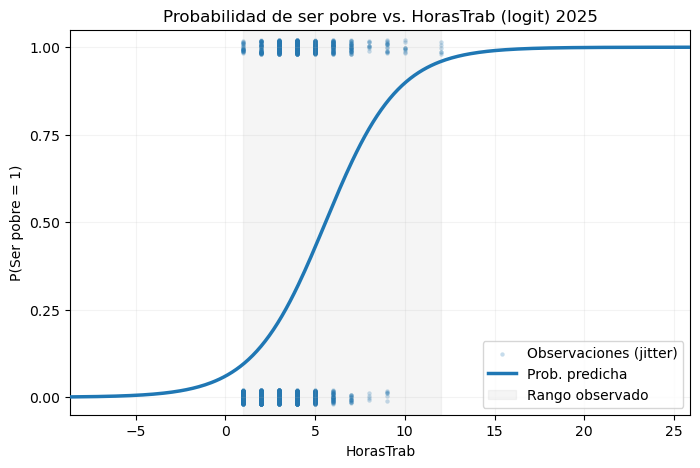

In [2587]:
var = 'HorasTrab'   # Variable predictora

# 1) Alinear columnas como en el modelo
cols25 = result25.model.exog_names
X_tr_aligned25 = x_tr25[cols25].copy()

# 2) Perfil base: fijamos todas las demás en su media
base25 = X_tr_aligned25.mean(numeric_only=True)
if 'const' in cols25:
    base25['const'] = 1

# 3) Descomponer el predictor lineal z = b_fijo + beta_var * X
beta25 = result25.params.reindex(cols25)
if var not in beta25.index:
    raise ValueError(f"'{var}' no está en el modelo.")

beta_var25 = float(beta25[var])
if np.isclose(beta_var25, 0.0):
    raise ValueError(f"El coeficiente de '{var}' es ~0: la curva será casi plana.")

# b_fijo = beta·base - beta_var*base[var]  (para que cuando X=base[var], z sea el de 'base')
b_fijo25 = float((beta25 * base25).sum() - beta_var25 * base25[var])

# 4) Elegimos un rango de z que muestre la S completa (≈ 0.1%..99.9% aprox)
z_grid25 = np.linspace(-7, 10, 300) 

# 5) Invertimos para obtener los X que generan esos z
x_grid25 = (z_grid25 - b_fijo25) / beta_var25

# Armamos las matrices de predicción
X_pred25 = pd.DataFrame([base25]*len(z_grid25))
X_pred25.columns = cols25
X_pred25[var] = x_grid25

# 6) Probabilidades predichas
p_hat25 = result25.predict(X_pred25)

# 7) Plot: S completa + puntos observados y sombreado del rango observado
plt.figure(figsize=(8,5))

# puntos observados (jitter)
rng = np.random.default_rng(42)
y_jit25 = y_tr25.values + rng.uniform(-0.02, 0.02, size=len(y_tr25))
plt.scatter(x_tr25[var], y_jit25, s=10, alpha=0.25, lw=0, label='Observaciones (jitter)')

# curva logística
plt.plot(x_grid25, p_hat25, lw=2.5, label='Prob. predicha', zorder=3)

# sombrear el rango observado para que se note dónde hay datos
obs_min, obs_max = x_tr25[var].min(), x_tr25[var].max()
plt.axvspan(obs_min, obs_max, color='grey', alpha=0.08, label='Rango observado')

plt.xlabel(var)
plt.ylabel('P(Ser pobre = 1)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.ylim(-0.05, 1.05)
plt.xlim(min(x_grid25), max(x_grid25))
plt.legend()
plt.title(f'Probabilidad de ser pobre vs. {var} (logit) 2025')
plt.grid(alpha=0.15)
plt.show()

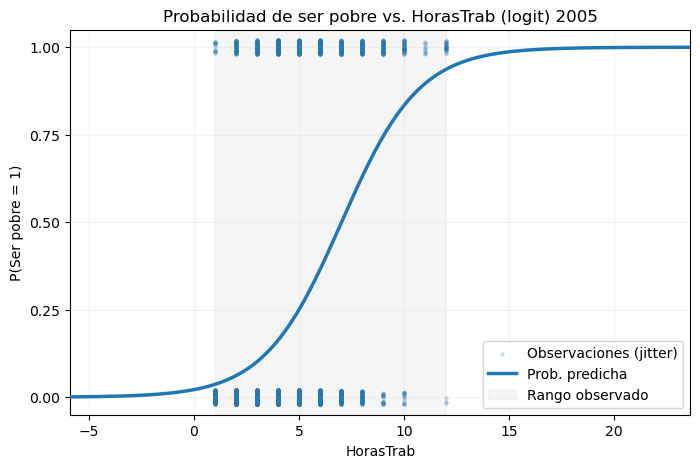

In [2731]:
var = 'HorasTrab'   # Variable predictora

# 1) Alinear columnas como en el modelo
cols05 = result05.model.exog_names
X_tr_aligned05 = x_tr05[cols05].copy()

# 2) Perfil base: fijamos todas las demás en su media
base05 = X_tr_aligned05.mean(numeric_only=True)
if 'const' in cols05:
    base05['const'] = 1

# 3) Descomponer el predictor lineal z = b_fijo + beta_var * X
beta05 = result05.params.reindex(cols05)
if var not in beta05.index:
    raise ValueError(f"'{var}' no está en el modelo.")

beta_var05 = float(beta05[var])
if np.isclose(beta_var05, 0.0):
    raise ValueError(f"El coeficiente de '{var}' es ~0: la curva será casi plana.")

# b_fijo = beta·base - beta_var*base[var]  (para que cuando X=base[var], z sea el de 'base')
b_fijo05 = float((beta05 * base05).sum() - beta_var05 * base05[var])

# 4) Elegimos un rango de z que muestre la S completa (≈ 1%..99%)
z_grid05 = np.linspace(-7, 9, 300)

# 5) Invertimos para obtener los X que generan esos z
x_grid05 = (z_grid05 - b_fijo05) / beta_var05

# Armamos las matrices de predicción
X_pred05 = pd.DataFrame([base05]*len(z_grid05))
X_pred05.columns = cols05
X_pred05[var] = x_grid05

# 6) Probabilidades predichas
p_hat05 = result05.predict(X_pred05)

# 7) Plot: S completa + puntos observados y sombreado del rango observado
plt.figure(figsize=(8,5))

# puntos observados (jitter)
rng = np.random.default_rng(42)
y_jit05 = y_tr05.values + rng.uniform(-0.02, 0.02, size=len(y_tr05))
plt.scatter(x_tr05[var], y_jit05, s=10, alpha=0.25, lw=0, label='Observaciones (jitter)')

# curva logística
plt.plot(x_grid05, p_hat05, lw=2.5, label='Prob. predicha', zorder=3)

# sombrear el rango observado para que se note dónde hay datos
obs_min, obs_max = x_tr05[var].min(), x_tr05[var].max()
plt.axvspan(obs_min, obs_max, color='grey', alpha=0.08, label='Rango observado')

plt.xlabel(var)
plt.ylabel('P(Ser pobre = 1)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.ylim(-0.05, 1.05)
plt.xlim(min(x_grid05), max(x_grid05))
plt.legend()
plt.title(f'Probabilidad de ser pobre vs. {var} (logit) 2005')
plt.grid(alpha=0.15)
plt.show()

# C. Método de Vecinos Cercanos (KNN)

## Estimación: Clasifiquen a las observaciones como “pobre”/“no pobre” en su región con Vecinos Cercanos (KNN) usando K={1,5,10} para su matriz X_train. Expliquen en no más de 2-3 oraciones como la elección de K se relaciona con el trade-off sesgo varianza.

In [2591]:
# 1) Limpieza: eliminar filas con NaN para entrenar correctamente
X_train_knn = x_tr25.dropna().copy()
y_train_knn = y_tr25.loc[X_train_knn.index]

# 2) Entrenar y predecir con distintos valores de K
valores_k = [1, 5, 10]
resultados = []

for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)

    # Predicciones dentro de la muestra (TRAIN)
    y_pred_train = knn.predict(X_train_knn)

    # Accuracy (porcentaje de aciertos)
    acc_train = accuracy_score(y_train_knn, y_pred_train)

    # Matriz de confusión
    cm = confusion_matrix(y_train_knn, y_pred_train)

    resultados.append({
        "K": k,
        "Accuracy (train)": round(acc_train, 4),
        "Verdaderos pobres": cm[1,1],
        "Falsos pobres": cm[0,1],
        "Verdaderos no pobres": cm[0,0],
        "Falsos no pobres": cm[1,0]
    })

# 3) Mostrar resultados
tabla_knn_train = pd.DataFrame(resultados)
print("📊 Resultados KNN (clasificación sobre la base de entrenamiento) 2025")
display(tabla_knn_train)

📊 Resultados KNN (clasificación sobre la base de entrenamiento) 2025


,K,Accuracy (train),Verdaderos pobres,Falsos pobres,Verdaderos no pobres,Falsos no pobres
0,1,1.00,630,3,1377,4
1,5,0.84,388,86,1294,246
2,10,0.77,254,83,1297,380


In [2592]:
# 1) Limpieza: eliminar filas con NaN para entrenar correctamente
X_train_knn = x_tr05.dropna().copy()
y_train_knn = y_tr05.loc[X_train_knn.index]

# 2) Entrenar y predecir con distintos valores de K
valores_k = [1, 5, 10]
resultados = []

for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)

    # Predicciones dentro de la muestra (TRAIN)
    y_pred_train = knn.predict(X_train_knn)

    # Accuracy (porcentaje de aciertos)
    acc_train = accuracy_score(y_train_knn, y_pred_train)

    # Matriz de confusión
    cm = confusion_matrix(y_train_knn, y_pred_train)

    resultados.append({
        "K": k,
        "Accuracy (train)": round(acc_train, 4),
        "Verdaderos pobres": cm[1,1],
        "Falsos pobres": cm[0,1],
        "Verdaderos no pobres": cm[0,0],
        "Falsos no pobres": cm[1,0]
    })

# 3) Mostrar resultados
tabla_knn_train = pd.DataFrame(resultados)
print("📊 Resultados KNN (clasificación sobre la base de entrenamiento) 2025")
display(tabla_knn_train)

📊 Resultados KNN (clasificación sobre la base de entrenamiento) 2025


,K,Accuracy (train),Verdaderos pobres,Falsos pobres,Verdaderos no pobres,Falsos no pobres
0,1,1.00,1175,6,3506,9
1,5,0.84,632,201,3311,552
2,10,0.80,408,154,3358,776


## Visualización: Grafiquen dos características numéricas en su matriz X_train y visualicen las clases predichas por KNN usando con K={1,5,10} con su frontera por clase “pobre”/“no pobre”. (Hint: revisar Tutorial 8)

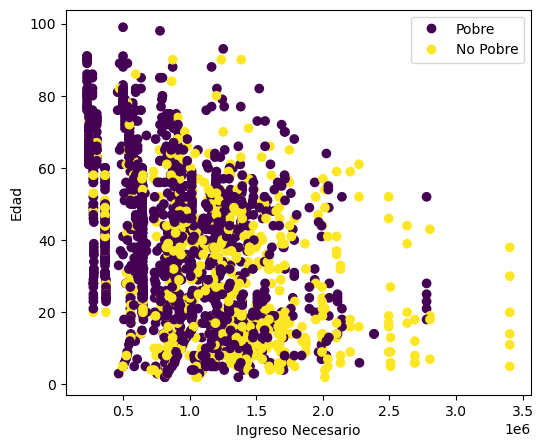

In [2594]:
# Armamos un DataFrame por si querés mirarlo
df_knn25 = pd.DataFrame(x_tr25, columns=["ingreso_necesario", "Edad"])
x_tr25["Pobre"] = y25

# Gráfico 2D coloreado por la clase y
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df_knn25["ingreso_necesario"], df_knn25["Edad"], c=x_tr25["Pobre"])
plt.xlabel("Ingreso Necesario")
plt.ylabel("Edad")
# Leyenda simple
handles, _ = scatter.legend_elements()
plt.legend(handles, ["Pobre", "No Pobre"], loc="best")
plt.show()

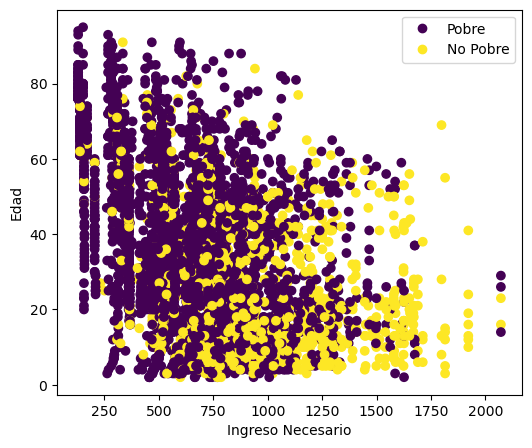

In [2595]:
# Armamos un DataFrame por si querés mirarlo
df_knn05 = pd.DataFrame(x_tr05, columns=["ingreso_necesario", "Edad"])
x_tr05["Pobre"] = y05

# Gráfico 2D coloreado por la clase y
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df_knn05["ingreso_necesario"], df_knn05["Edad"], c=x_tr05["Pobre"])
plt.xlabel("Ingreso Necesario")
plt.ylabel("Edad")
# Leyenda simple
handles, _ = scatter.legend_elements()
plt.legend(handles, ["Pobre", "No Pobre"], loc="best")
plt.show()

In [2596]:
x_tr["Pobre"].shape

(8964,)

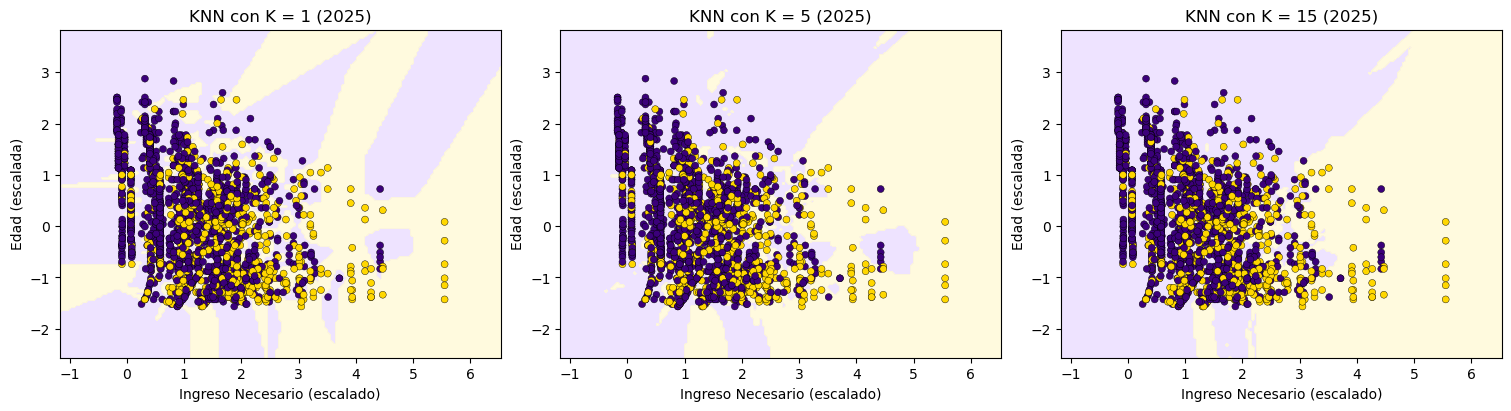

In [2597]:
# Usamos X, y del bloque anterior
X_arr25 = df_knn25
y_arr25 = x_tr25["Pobre"]

# Escalado (muy importante para KNN)
scaler25 = StandardScaler().fit(X_arr25)
X_scaled25 = scaler.transform(X_arr25)

# Malla para pintar la frontera
h = 0.05
x_min25, x_max25 = X_scaled25[:, 0].min() - 1, X_scaled25[:, 0].max() + 1
y_min25, y_max25 = X_scaled25[:, 1].min() - 1, X_scaled25[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min25, x_max25, h),
                     np.arange(y_min25, y_max25, h))

Ks = [1, 5, 15]

fig, axes = plt.subplots(1, len(Ks), figsize=(5 * len(Ks), 4), constrained_layout=True)

# Colormaps (suaves)
cmap_bg = ListedColormap(["#eadcff", "#fff9d6"])   # tonos suaves del violeta y amarillo
cmap_pts = ListedColormap(["#3b007a", "#ffd700"])  # puntos: violeta y amarillo

for ax, K in zip(axes, Ks):
    # Entrenar KNN
    knn25 = KNeighborsClassifier(n_neighbors=K, weights="uniform")
    knn25.fit(X_scaled25, y_arr25)

    # Predicción sobre la malla
    Z25 = knn25.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Fondo con la frontera
    ax.contourf(xx, yy, Z25, alpha=0.8, cmap=cmap_bg, levels=[-0.5, 0.5, 1.5])

    # Puntos de entrenamiento (en el espacio escalado)
    ax.scatter(X_scaled25[:, 0], X_scaled25[:, 1], c=y_arr25, cmap=cmap_pts, s=25, edgecolor="k", linewidth=0.3)

    ax.set_title(f"KNN con K = {K} (2025)")
    ax.set_xlabel("Ingreso Necesario (escalado)")
    ax.set_ylabel("Edad (escalada)")


plt.show()

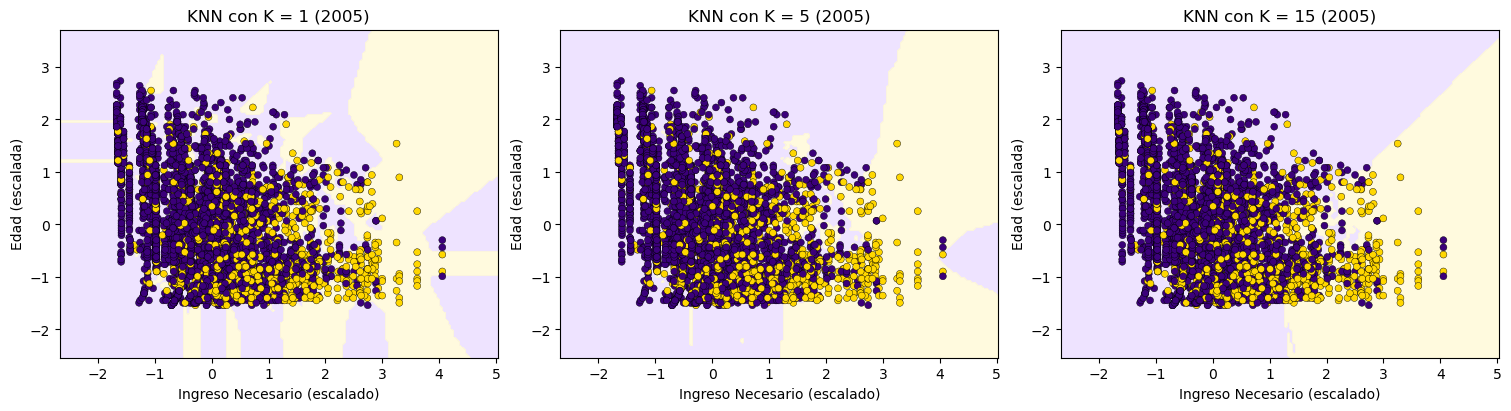

In [2733]:
# Usamos X, y del bloque anterior
X_arr05 = df_knn05
y_arr05 = y_tr05

# Escalado (muy importante para KNN)
scaler05 = StandardScaler().fit(X_arr05)
X_scaled05 = scaler05.transform(X_arr05)

# Malla para pintar la frontera
h = 0.05
x_min05, x_max05 = X_scaled05[:, 0].min() - 1, X_scaled05[:, 0].max() + 1
y_min05, y_max05 = X_scaled05[:, 1].min() - 1, X_scaled05[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min05, x_max05, h),
                     np.arange(y_min05, y_max05, h))

Ks = [1, 5, 15]

fig, axes = plt.subplots(1, len(Ks), figsize=(5 * len(Ks), 4), constrained_layout=True)

# Colormaps (suaves)
cmap_bg = ListedColormap(["#eadcff", "#fff9d6"])   # tonos suaves del violeta y amarillo
cmap_pts = ListedColormap(["#3b007a", "#ffd700"])  # puntos: violeta y amarillo

for ax, K in zip(axes, Ks):
    # Entrenar KNN
    knn05 = KNeighborsClassifier(n_neighbors=K, weights="uniform")
    knn05.fit(X_scaled05, y_arr05)

    # Predicción sobre la malla
    Z05 = knn05.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Fondo con la frontera
    ax.contourf(xx, yy, Z05, alpha=0.8, cmap=cmap_bg, levels=[-0.5, 0.5, 1.5])

    # Puntos de entrenamiento (en el espacio escalado)
    ax.scatter(X_scaled05[:, 0], X_scaled05[:, 1], c=y_arr05, cmap=cmap_pts, s=25, edgecolor="k", linewidth=0.3)

    ax.set_title(f"KNN con K = {K} (2005)")
    ax.set_xlabel("Ingreso Necesario (escalado)")
    ax.set_ylabel("Edad (escalada)")


plt.show()

##

## Para obtener el K óptimo usando Cross-Validation, dividiendo la base de respondieron_2025 en 5 partes. Muestren cómo eligen el óptimo a través del gráfico visto en la tutorial sobre Accuracy en cada K. Llamenle a este modelo KNN con K-CV.

Mejor K por accuracy CV: 25 | accuracy CV media = 0.706


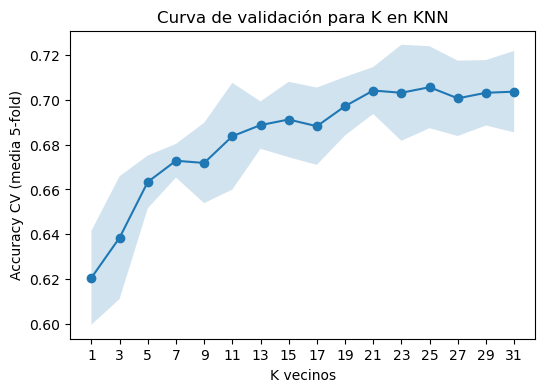

In [2640]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=444)

Ks = list(range(1, 32, 2))  # K impares para evitar empates
mean_scores = []
std_scores  = []

for K in Ks:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=K))
    ])
    scores = cross_val_score(pipe, X_arr25, y_arr25, cv=cv, scoring="accuracy")
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

best_idx = int(np.argmax(mean_scores))
best_k = Ks[best_idx]
print(f"Mejor K por accuracy CV: {best_k} | accuracy CV media = {mean_scores[best_idx]:.3f}")

# Curva de validación
plt.figure(figsize=(6,4))
plt.plot(Ks, mean_scores, marker="o")
plt.fill_between(Ks,
                 np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores),
                 alpha=0.2)
plt.xlabel("K vecinos")
plt.ylabel("Accuracy CV (media 5-fold)")
plt.title("Curva de validación para K en KNN")
plt.xticks(Ks)
plt.show()

# D. Desempeño de modelos, elección y predicción afuera de la muestra

In [2693]:
set(x_test25.columns) - set(x_tr25.columns)

set()

In [2695]:
x_test25 = x_test25.drop(columns=['CoberturaNan', 'Desocupado', 'SeguroPublico'], errors='ignore')

In [2703]:
logit_pred = (p_logit > 0.5).astype(int)
cm_logit = confusion_matrix(y_test25, logit_pred)
print("Confusion Matrix - Logit\n", cm_logit)

Confusion Matrix - Logit
 [[815  88]
 [178 212]]


--- Ejecutando Punto 7: Cross-Validation para K-NN (Año 2025) ---
K óptimo encontrado (2025): 15


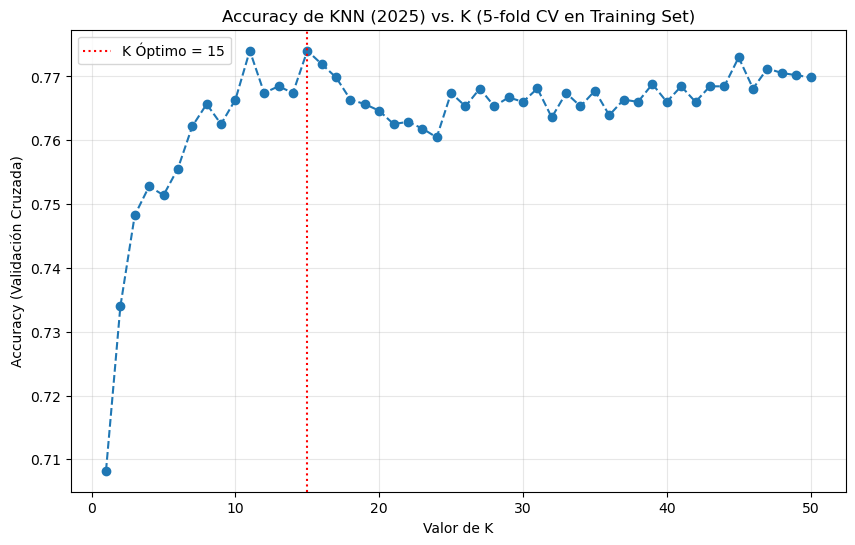

In [2699]:
# (Asumo que x_train25, x_test25, y_train25, y_test25 ya están definidos desde las celdas 2141 y 2143)

# Columnas a dropear (basado en tu celda 2328)
cols_to_drop_25 = ['CoberturaNan', 'SeguroPublico', 'Desocupado']

# --- 1. Limpiar Train 2025 (como en celdas 2259 y 2328) ---
x_train25_clean = x_train25.drop(columns=cols_to_drop_25, errors='ignore')
mask_train = x_train25_clean.notna().all(axis=1) & y_train25.notna()
x_tr25 = x_train25_clean.loc[mask_train].copy().astype('float64')
y_tr25 = y_train25.loc[mask_train].copy().astype('int64')

# --- 2. Limpiar Test 2025 (Necesario para Punto 8) ---
x_test25_clean = x_test25.drop(columns=cols_to_drop_25, errors='ignore')
mask_test = x_test25_clean.notna().all(axis=1) & y_test25.notna()
x_te25 = x_test25_clean.loc[mask_test].copy().astype('float64')
y_te25 = y_test25.loc[mask_test].copy().astype('int64')

# --- 3. (Punto 7) Encontrar K-Óptimo para KNN (2025) ---
print("--- Ejecutando Punto 7: Cross-Validation para K-NN (Año 2025) ---")

# Estandarizar los datos para KNN
# (Importaste StandardScaler en la celda 1780)
scaler_knn = StandardScaler()
x_tr25_scaled = scaler_knn.fit_transform(x_tr25)

# (Importaste StratifiedKFold y cross_val_score en la celda 1780)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=444)
k_range = range(1, 51) # Probamos K de 1 a 50
k_scores = []

for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    # Usamos el set de training (x_tr25_scaled) para la validación cruzada
    scores = cross_val_score(knn_cv, x_tr25_scaled, y_tr25, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())

# Encontrar el K óptimo
k_optimo_25 = k_range[np.argmax(k_scores)]
print(f"K óptimo encontrado (2025): {k_optimo_25}")

# Graficar (como pide el TP 3, punto 7)
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--')
plt.title('Accuracy de KNN (2025) vs. K (5-fold CV en Training Set)')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy (Validación Cruzada)')
plt.axvline(k_optimo_25, color='red', linestyle=':', label=f'K Óptimo = {k_optimo_25}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


--- Ejecutando Punto 8: Comparación de Modelos (Año 2025) ---
Evaluando Modelo Logit (2025)...
Evaluando Modelo KNN (K=15) (2025)...

--- Métricas en Base de Testeo (2025) ---
Logit Accuracy: 0.8013
KNN (K=15) Accuracy: 0.7997
Logit Recall (Sensibilidad): 0.5730
KNN (K=15) Recall (Sensibilidad): 0.5324
Logit Precision: 0.7067
KNN (K=15) Precision: 0.7243
Logit AUC: 0.8418
KNN (K=15) AUC: 0.8376

--- Matriz de Confusión (Logit 2025) ---
[[780  88]
 [158 212]]
(Filas: Verdadero, Columnas: Predicho)

--- Matriz de Confusión (KNN K-CV 2025) ---
[[793  75]
 [173 197]]
(Filas: Verdadero, Columnas: Predicho)


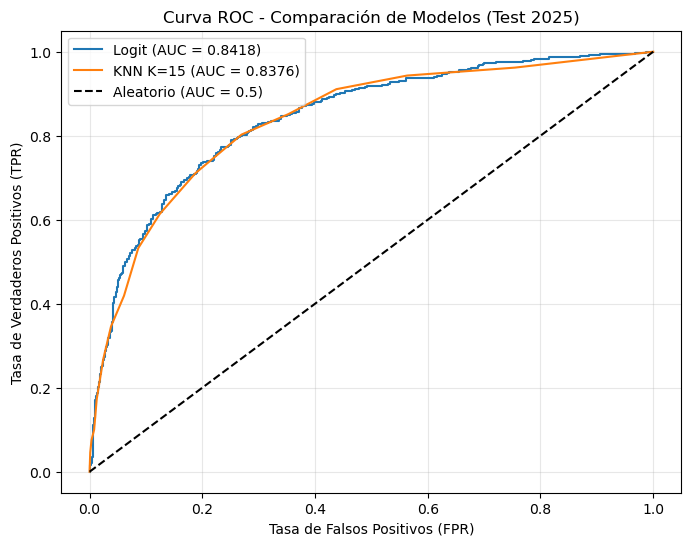

In [2701]:
print("\n--- Ejecutando Punto 8: Comparación de Modelos (Año 2025) ---")

# (Importaste las métricas en la celda 1780)
from sklearn.metrics import precision_score, f1_score

# --- 1. Modelo Logit (Datos de Testeo) ---
# (Usamos el 'result25' que ya entrenaste en la celda 2334)

print("Evaluando Modelo Logit (2025)...")
# Añadir constante a x_te25 (limpio y NO escalado, igual que en el train)
x_te_logit = sm.add_constant(x_te25, has_constant='add')

# Asegurarse que las columnas coincidan
cols_logit = result25.model.exog_names
x_te_logit_aligned = x_te_logit[cols_logit]

# Predicciones de Probabilidad
p_hat_logit = result25.predict(x_te_logit_aligned)
# Predicciones de Clase (Umbral 0.5)
y_hat_logit = (p_hat_logit >= 0.5).astype(int)

# --- 2. Modelo KNN con K-CV (Datos de Testeo) ---
print(f"Evaluando Modelo KNN (K={k_optimo_25}) (2025)...")

# Entrenar el modelo final KNN en TODO el training set (escalado)
knn_final = KNeighborsClassifier(n_neighbors=k_optimo_25)
knn_final.fit(x_tr25_scaled, y_tr25)

# Escalar el test set (x_te25) con el scaler fiteado en train
x_te25_scaled = scaler_knn.transform(x_te25)

# Predicciones de Probabilidad (para ROC)
p_hat_knn = knn_final.predict_proba(x_te25_scaled)[:, 1] # Prob de la clase 1 (pobre)
# Predicciones de Clase
y_hat_knn = knn_final.predict(x_te25_scaled)


# --- 3. Métricas y Comparación (Punto 8) ---
# (y_te25 es el y_test limpio)

# Métricas solicitadas (Accuracy, Recall, Precision, F1-Score, AUC)
acc_logit = accuracy_score(y_te25, y_hat_logit)
acc_knn = accuracy_score(y_te25, y_hat_knn)

# El TP pide 2 métricas más. Usemos Recall (Sensibilidad) y Precision.
recall_logit = recall_score(y_te25, y_hat_logit)
recall_knn = recall_score(y_te25, y_hat_knn)

precision_logit = precision_score(y_te25, y_hat_logit)
precision_knn = precision_score(y_te25, y_hat_knn)

auc_logit = roc_auc_score(y_te25, p_hat_logit)
auc_knn = roc_auc_score(y_te25, p_hat_knn)

print("\n--- Métricas en Base de Testeo (2025) ---")
print(f"Logit Accuracy: {acc_logit:.4f}")
print(f"KNN (K={k_optimo_25}) Accuracy: {acc_knn:.4f}")
print(f"Logit Recall (Sensibilidad): {recall_logit:.4f}")
print(f"KNN (K={k_optimo_25}) Recall (Sensibilidad): {recall_knn:.4f}")
print(f"Logit Precision: {precision_logit:.4f}")
print(f"KNN (K={k_optimo_25}) Precision: {precision_knn:.4f}")
print(f"Logit AUC: {auc_logit:.4f}")
print(f"KNN (K={k_optimo_25}) AUC: {auc_knn:.4f}")

# --- 4. Matrices de Confusión (Punto 8) ---
print("\n--- Matriz de Confusión (Logit 2025) ---")
cm_logit = confusion_matrix(y_te25, y_hat_logit)
print(cm_logit)
print("(Filas: Verdadero, Columnas: Predicho)")


print("\n--- Matriz de Confusión (KNN K-CV 2025) ---")
cm_knn = confusion_matrix(y_te25, y_hat_knn)
print(cm_knn)
print("(Filas: Verdadero, Columnas: Predicho)")

# --- 5. Curva ROC (Punto 8) ---
fpr_logit, tpr_logit, _ = roc_curve(y_te25, p_hat_logit)
fpr_knn, tpr_knn, _ = roc_curve(y_te25, p_hat_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, label=f'Logit (AUC = {auc_logit:.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN K={k_optimo_25} (AUC = {auc_knn:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Modelos (Test 2025)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Con el método que seleccionaron, predigan qué personas son pobres dentro de la base norespondieron para 2025. ¿Qué proporción de las personas que no respondieron pudieron identificar como pobres?

In [ ]:
norespondieron_d.columns

In [2651]:
norespondieron_d = norespondieron_d.rename(columns={
    'CODUSU': 'CODUSU',
    'COMPONENTE': 'COMPONENTE',
    'CH04': 'Sexo',
    'CH06': 'Edad',
    'educ': 'Educ',
    'IX_TOT': 'HorasTrab',
    'CH07_1': 'Unido',
    'CH07_2': 'Casado',
    'CH07_3': 'Divorciado',
    'CH07_4': 'Viudo',
    'CH07_<NA>': 'CivilNan',
    'CH11_1': 'EducPub',
    'CH11_2': 'EducPriv',
    'CH11_<NA>': 'EducNan',
    'ESTADO_1': 'Ocupado',
    'ESTADO_2': 'Desocupado',
    'ESTADO_3': 'Inactivo',
    'ESTADO_<NA>': 'EstadoNan',
    'CH08_1': 'ObraSocial',
    'CH08_2': 'Emergencias',
    'CH08_3': 'SeguroPublico',
    'CH08_<NA>': 'CoberturaNan',
    'CH09_1': 'Leer',
    'CH09_<NA>': 'LeerNan',
    'CH16_1': 'Provincia',
    'CH16_2': 'Nacional',
    'CH16_3': 'Internacional',
    'CH16_<NA>': 'ResidenciaNan',
    'ingreso_necesario': 'ingreso_necesario'
})

norespondieron_d.columns

Index(['CODUSU', 'COMPONENTE', 'Sexo', 'Edad', 'Educ', 'HorasTrab',
       'ingreso_necesario', 'pobre', 'Unido', 'Casado', 'Divorciado', 'Viudo',
       'CivilNan', 'EducPub', 'EducPriv', 'EducNan', 'Ocupado', 'Desocupado',
       'Inactivo', 'EstadoNan', 'ObraSocial', 'Emergencias', 'SeguroPublico',
       'CoberturaNan', 'Leer', 'LeerNan', 'Provincia', 'Nacional',
       'Internacional', 'ResidenciaNan'],
      dtype='object')

In [ ]:
x_tr25.columns

In [2657]:
norespondieron_d = norespondieron_d.drop(columns=['CODUSU',
 'COMPONENTE',
 'CivilNan',
 'CoberturaNan',
 'Desocupado',
 'EstadoNan',
 'LeerNan',
 'ResidenciaNan',
 'SeguroPublico'], errors='ignore')

In [2659]:
set(norespondieron_d) - set(x_tr25)

{'pobre'}

In [ ]:
modelo_sm = sm.Logit(y, X_sm)

In [2677]:
# --- PUNTO 10 (Solución con .astype('float64')) ---

print("--- Ejecutando Punto 10 (Forzando conversión a numérico) ---")

try:
    # 1. Obtener la lista de features que usó el modelo (SIN 'const')
    feature_cols = [col for col in result25.model.exog_names if col != 'const']
    print(f"Se usarán {len(feature_cols)} features del modelo (ej: {feature_cols[0]}, {feature_cols[1]}...)")

    # 2. Cargar datos 'norespondieron_d' (asumiendo que ya es 2025)
    x_noresp_raw = norespondieron_d
    print(f"Datos 'norespondieron_d' cargados: {len(x_noresp_raw)} filas")

    # 3. ALINEAR COLUMNAS: Seleccionar solo las features del modelo
    x_noresp_prepared = x_noresp_raw.reindex(columns=feature_cols)

    # 4. IMPUTAR NaNs con 0
    X_noresp_25_imputado = x_noresp_prepared.fillna(value=0)
    print(f"NaNs en 'norespondieron_d' rellenados con 0.")

    # 5. !! CORRECCIÓN CLAVE: Forzar TODO a numérico !!
    #    Esto convierte cualquier columna de texto (object) que haya quedado.
    X_noresp_25_numeric = X_noresp_25_imputado.astype('float64')
    print("Columnas forzadas a tipo 'float64'.")

    # 6. Añadir constante para Logit (usando la versión numérica)
    X_noresp_listo = sm.add_constant(X_noresp_25_numeric, has_constant='add')
    
    # (Alinear por si acaso, incluyendo 'const')
    X_noresp_listo_alineado = X_noresp_listo.reindex(columns=result25.model.exog_names, fill_value=0)

    # 7. Predecir
    print("Prediciendo con Modelo Logit...")
    p_hat = result25.predict(X_noresp_listo_alineado)
    y_pred_noresp = (p_hat >= 0.5).astype(int)
    print("Predicción Logit completada.")

    # 8. Calcular Proporción
    if len(y_pred_noresp) > 0:
        prop_pobres = np.mean(y_pred_noresp)
        print("\n" + "="*30)
        print("--- Resultado Final Punto 10 ---")
        print(f"La proporción de pobres predicha para la base 'norespondieron_d' es: {prop_pobres:.2%}")
        print("="*30)
    else:
        print("\nError: 'norespondieron_d' parece tener 0 filas.")

except NameError as e:
    print(f"\nERROR: {e}")
    print("Asegúrate de tener 'norespondieron_d' y 'result25' (celda 2334) en memoria.")
except ValueError as e:
    print(f"\nERROR de Conversión: {e}")
    print("Esto significa que una columna tiene texto que no se puede convertir a número (ej: 'Hombre' en vez de 1).")
except Exception as e:
    print(f"\nERROR: Un error inesperado ocurrió: {e}")

--- Ejecutando Punto 10 (Forzando conversión a numérico) ---
Se usarán 20 features del modelo (ej: Sexo, Edad...)
Datos 'norespondieron_d' cargados: 2985 filas
NaNs en 'norespondieron_d' rellenados con 0.
Columnas forzadas a tipo 'float64'.
Prediciendo con Modelo Logit...
Predicción Logit completada.

--- Resultado Final Punto 10 ---
La proporción de pobres predicha para la base 'norespondieron_d' es: 31.73%


In [2685]:
respondieron_d['pobre'].value_counts()

pobre
0.00    9861
1.00    3819
Name: count, dtype: int64